In [24]:
import tomosipo as ts
import numpy as np
import pickle
import mrcfile
import numpy as np
from scipy.ndimage import zoom
from sklearn.manifold import TSNE
from sklearn.manifold import TSNE
from numpy import reshape
import seaborn as sns
import pandas as pd  
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import v_measure_score
import os
%matplotlib inline


In [25]:
vg = ts.volume(shape=(32, 32, 32), size=(1, 1, 1))
pg = ts.parallel(angles=32, shape=(48, 48), size=(1.5, 1.5))

In [26]:
svg = ts.svg(vg, pg)
svg.save("./doc/img/intro_forward_projection_geometries.svg")

In [27]:
A = ts.operator(vg, pg)


In [28]:
x = np.ones(A.domain_shape, dtype=np.float32)

In [29]:
y = A(x)

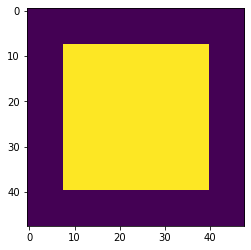

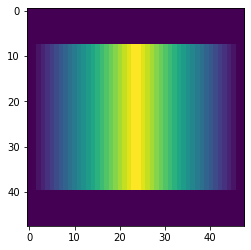

In [30]:
import matplotlib.pyplot as plt
plt.imshow(y[:, 0, :]) # first projection
plt.show()
plt.imshow(y[:, 8, :]) # quarter rotation
plt.show()

In [31]:
"""
Load 3DVA angles
"""
f = open('./data/angles_3DVA.txt')
text = []
for line in f:
    floats_list = [float(item) for item in line.split()]

    text.append(floats_list[:3])
angles = np.array(text)
print(np.max(angles[:, 0]))
print(np.max(angles[:, 1]))
print(np.max(angles[:, 2]))
angles[:, 0] = angles[:, 0] / 360 * 2 *np.pi
angles[:, 1] = angles[:, 0] / 360 * 1 *np.pi
angles[:, 2] = angles[:, 0] / 360 * 2 *np.pi

print(angles[:5])
print(angles.shape)
angles2 = angles

359.95001
178.00002
359.95105
[[2.28411239 0.01993264 0.03986528]
 [2.05058716 0.01789475 0.0357895 ]
 [6.10777989 0.05330043 0.10660087]
 [0.75984672 0.00663091 0.01326183]
 [5.85749933 0.05111632 0.10223265]]
(9453, 3)


In [32]:
"""
Load 3DVA order
"""
f = open('./data/70S_5class_simu_labels.txt')
text = []
for line in f:
    intlist = [int(item) for item in line.split()]

    text.append(intlist[0])
print(text[:5])
S_count = []
for i in range(5):
    S_count.append( text.count(i))
    print(i, text.count(i))
Index_3DVA = text
#You can see that the mean structure is 


[3, 0, 2, 0, 2]
0 2804
1 1904
2 1911
3 1417
4 1417


In [33]:
with open('./data/3DVA_images_22.pkl', 'rb') as f:
    new_projection = pickle.load(f)

(9453, 34, 34)


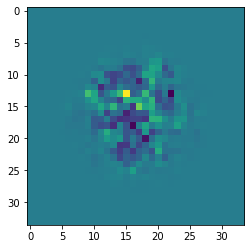

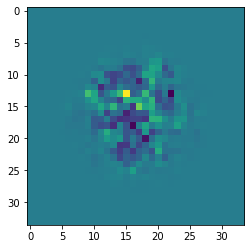

In [34]:
#Add noise 
print(new_projection.shape)
plt.imshow(new_projection[0])
plt.show()
sn_ratio = 0.5
num_imgs = new_projection.shape[0]
img_size = new_projection.shape[-1]


noise_var = new_projection.var()/sn_ratio
#new_projection = new_projection + np.sqrt(noise_var)*np.random.randn(num_imgs, img_size, img_size)
plt.imshow(new_projection[0])
plt.show()

with open(f'3DVA_noisy_data.pkl', 'wb') as f:
    pickle.dump(new_projection, f)

In [35]:
import astra
ProjSize = 34
with open('./data/3DVA_Orientation_Vectors.pkl', 'rb') as handle:
    Orientation_Vectors = pickle.load(handle  )
Orientation_Vectors = Orientation_Vectors
print(Orientation_Vectors.shape)
Proj_geom = astra.create_proj_geom('parallel3d_vec', ProjSize, ProjSize, Orientation_Vectors)
print(Orientation_Vectors.shape)

(9453, 12)
(9453, 12)


In [36]:
from tomosipo.geometry.parallel_vec import *
#pg = ParallelVectorGeometry.from_astra(Proj_geom)
pg = ts.from_astra(Proj_geom)

In [37]:
#vg = ts.volume(shape=(32, 32, 32), size=(1, 1, 1))
#pg = ts.parallel(angles=50, shape=(48, 48), size=(1.5, 1.5))
Proj_geom = astra.create_proj_geom('parallel3d_vec', ProjSize, ProjSize, Orientation_Vectors)
Vol_geom = astra.create_vol_geom(34, 34, 34)
vg = ts.from_astra(Vol_geom)
pg = ts.from_astra(Proj_geom)
A = ts.operator(vg, pg)
from scipy.ndimage import zoom


In [38]:
print(pg.ray_dir[:5])
print(pg.det_v[:5])
print(pg.det_u[:5])


[[ 9.99801351e-01  7.94357283e-04 -1.99154852e-02]
 [ 9.99839893e-01  6.40273182e-04 -1.78823350e-02]
 [ 9.98579868e-01  5.66843270e-03 -5.29727846e-02]
 [ 9.99978016e-01  8.79348061e-05 -6.63028183e-03]
 [ 9.98693845e-01  5.21438774e-03 -5.08272947e-02]]
[[ 0.01507199 -0.68395708  0.72936654]
 [ 0.01587343 -0.49303474  0.8698648 ]
 [-0.00929691  0.99760753 -0.06850385]
 [ 0.00456741  0.71574344  0.69834839]
 [-0.02109907  0.94808841 -0.31730615]]
[[-0.01304196 -0.72952182 -0.68383318]
 [-0.00825966 -0.87000939 -0.49296597]
 [ 0.05245774  0.06889905  0.9962435 ]
 [ 0.00480699 -0.69836332  0.7157273 ]
 [ 0.04653421  0.3179641   0.94696008]]


In [39]:
print(Orientation_Vectors[:5])
print(pg[:5])

[[-1.99154852e-02  7.94357283e-04  9.99801351e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -6.83833182e-01 -7.29521821e-01
  -1.30419594e-02  7.29366543e-01 -6.83957076e-01  1.50719889e-02]
 [-1.78823350e-02  6.40273182e-04  9.99839893e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -4.92965970e-01 -8.70009385e-01
  -8.25966138e-03  8.69864802e-01 -4.93034745e-01  1.58734322e-02]
 [-5.29727846e-02  5.66843270e-03  9.98579868e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00  9.96243497e-01  6.88990537e-02
   5.24577394e-02 -6.85038548e-02  9.97607533e-01 -9.29691395e-03]
 [-6.63028183e-03  8.79348061e-05  9.99978016e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00  7.15727301e-01 -6.98363318e-01
   4.80698984e-03  6.98348387e-01  7.15743438e-01  4.56740827e-03]
 [-5.08272947e-02  5.21438774e-03  9.98693845e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00  9.46960081e-01  3.17964104e-01
   4.65342118e-02 -3.17306147e-01  9.48088413e-01 -2.10990723e-02]]
ts.p

In [71]:
"""
Get original mean subtracted structs
"""
with open('./data/3DVA_subtracted_vols34.pkl', 'rb') as  f:
    mean_sbtracted_structs = pickle.load(f)
print(len(mean_sbtracted_structs))
print(type(mean_sbtracted_structs[0]))
for i in range(5):
    mean_sbtracted_structs[i] = mean_sbtracted_structs[i].tolist()
mean_sbtracted_structs = np.array(mean_sbtracted_structs)
print(mean_sbtracted_structs.shape)

5
<class 'numpy.ndarray'>
(5, 34, 34, 34)


In [103]:
from tomosipo.torch_support import to_autograd
import time
"""
First step. write out the
1. Expectation
2. likelihood
Then use .backward solve it


For AU with U with batch n^3, to_autograd take batch input, which is actually what I want!!!!, so no need for one by one concatenate!!!

"""
def reshape_fortran(x, shape):
    if len(x.shape) > 0:
        x = x.permute(*reversed(range(len(x.shape))))
    return x.reshape(*reversed(shape)).permute(*reversed(range(len(shape))))
def Trace_bradcast(a):
    b = torch.einsum('bii->b', a)
    return b
import torch


class MPCA_3d_recon():
    def __init__(self, ProjSize, num_image, n_component, op, Images, exp_name, batch_size = 1000, n_iter = 20):
        #init
        self.exp_name = exp_name
        self.ProjSize  = ProjSize
        self.z_size = n_component # First set 1 for simplicity
        self.num_image = num_image
        self.n_component = n_component
        self.batch_size = batch_size
        self.n_iter = n_iter
        
        """
        projection operator and images
        """
        self.op = to_autograd(op)
        Images = torch.tensor(Images)
        self.All_Image = Images
        self.I = reshape_fortran(Images, (self.num_image, self.ProjSize*self.ProjSize , 1)).float() # N x D^2 x 1
        self.All_I = self.I
        """
        paramters we want to find
        """
        x = int((ProjSize - self.z_size ) /2)
        self.U1 = torch.eye(self.ProjSize)[:, x : x + self.z_size] +1
        self.U2 = torch.eye(self.ProjSize)[:, x : x + self.z_size] +1 
        self.U3 = torch.eye(self.ProjSize)[:, x : x + self.z_size] +1
        #print('self.U1',self.U1.shape)
        self.U1.data = torch.qr(self.U1.data)[0]
        self.U2.data = torch.qr(self.U2.data)[0]
        self.U3.data = torch.qr(self.U3.data)[0]
        #print('ortho_U1',ortho_U1.shape)
        #print(ortho_U1.T@ortho_U1)
        #self.mask = torch.eye(self.ProjSize)[:, x : x + self.z_size]
        
        self.U1.requires_grad =True
        self.U2.requires_grad =True
        self.U3.requires_grad =True
        self.All_U = torch.kron(self.U1, torch.kron(self.U2, self.U3))
        self.Sigma_Z_inv = torch.eye(self.n_component ** 3) # size: p1 x p2 x p3 
        self.sigma = torch.ones(self.batch_size).reshape(-1, 1 ,1) * 1
        #print('sigma monotoring',torch.mean(self.sigma))
        """
        Expectation term
        or so called missing data
        """
        self.mu = torch.abs(torch.ones((self.batch_size, n_component **3,1)))
        self.BigSigma_I = torch.abs(torch.ones((self.batch_size, self.n_component**3, self.n_component**3 )))

       

    def A_pro_All_U(self, detach_list = []):
        #print('in A por U')
        #self.All_U # shape = Ps ^3 x n  ^3: which we should make it Ps x Ps x Ps x n ^3 to process
        #A: Ps x Ps x Ps x 1 ->  Ps x Ps x 1
        
        #So overal, we have Mu = N x D^3 x n^3
        #AMu = N x D^2 x n^3
        """
        for i in range(self.n_component**3):
            Vol_i = self.All_U[:, i].reshape(self.ProjSize, self.ProjSize,self.ProjSize)
            Proj_i = self.op(Vol_i).permute(1, 0, 2)
            Proj_i = reshape_fortran(Proj_i, (self.num_image, self.ProjSize*self.ProjSize ,1))
            
            #print(Proj_i.shape)
            if i == 0:
                self.AU = Proj_i
            else:
                self.AU = torch.cat((self.AU, Proj_i), 2)
        #print('self.AU',self.AU.shape)
        
        #Broad cast: torch.matmul
        # (AU).T(AU) = torch.matmul(self.AU.permute(0,2,1), self.AU.permute(0,2,1))
        #torch.matmul(self.AU.permute(0,2,1), self.AU)
        """
        U1 , U2, U3 = self.U1, self.U2, self.U3
        if 1 in detach_list:
            U1 = U1.detach()
        if 2 in detach_list:
            U2 = U2.detach()
        if 3 in detach_list:
            U3 = U3.detach()
        
        
        self.All_U = torch.kron(U1, torch.kron(U2, U3))
        self.All_U_kron_shape = self.All_U
        self.All_U = reshape_fortran(self.All_U, (self.ProjSize, self.ProjSize, self.ProjSize, self.n_component**3)) #D^3 x n^3 -> D xD x D x n^3
        self.All_U = self.All_U.permute(3, 0, 1, 2) # make it n x Dx Dx D
        #print(self.All_U.shape)
        self.AU = self.op( self.All_U) # n x Dx Dx D -> n x D x N x D
        #print('self.AU',self.AU.shape)
        self.AU = self.AU.permute(2, 0, 1, 3) # N x n x D x D
        #print( self.AU.permute(2, 0, 1, 3).shape)
        self.AU = reshape_fortran(self.AU, (self.batch_size, self.n_component**3, self.ProjSize**2))
        self.AU = self.AU.permute(0, 2, 1) # N x n x D x D
        
        #print('self.AU',self.AU.shape)
        
    def Expectation(self):
        #print('in Exp')
        
        """
        First, get all projection information
        
        ro_j = 1/sigma^2 * (Sigmz_Z_inv + 1/sigma^2 * (Au)^TAu)^(-1)(Au)^TI
        
        #We expect to get a n_image x n_component matrix for ro
        
        BigSigma = I - 1 / sigma^2 * (I + 1/sigma^2 * (Au)^TAu)^(-1) (Au)^TAu9htu
        
        Here, the shape of All_U is PS^3 x n_component^3, but A can only process a 3d volume PS^3 at once
        
        """
        #print(torch.unsqueeze(self.Sigma_Z_inv,0  ).shape)
        #print((1 / self.sigma **2).shape)
        
        UTATAU = torch.matmul(self.AU.permute(0,2,1), self.AU)
        #print(UTAAU.shape)
        #print((1 / self.sigma **2 * UTAAU ).shape)
        self.mu = torch.inverse(torch.unsqueeze(self.Sigma_Z_inv,0  ) + 1 / self.sigma **2 * UTATAU ) * 1 / self.sigma **2 
        self.mu = torch.matmul(self.mu , self.AU.permute(0,2,1))
        self.mu = torch.matmul(self.mu, self.I)
        #print('self.mu.shape',self.mu.shape)
        
        
        """
        So we found Mu
        Then we found Sigma_I
        torch.inverse can broadcast through batch, so just use it
        """
        self.BigSigma_I = torch.inverse((torch.unsqueeze(self.Sigma_Z_inv,0  ) + 1 / self.sigma **2 * UTATAU )) + torch.matmul(self.mu, self.mu.permute(0,2,1))
        #print('self.BigSigma_I', self.BigSigma_I.shape)
        self.mu = self.mu.detach()
        self.BigSigma_I = self.BigSigma_I.detach()
        #print('torch.mean(self.mu)', torch.mean(self.mu))
        #print('torch.mean(self.BigSigma_I)', torch.mean(self.BigSigma_I))
        
    def Q_Function(self, ):
        #print('in Q')
        """
        #left term
        #print('self.AU', torch.mean(self.AU))
        print('in Q')
        print('self.mu ', torch.mean(self.mu ))
        print('self.BigSigma_I', torch.mean(self.BigSigma_I))
        #print('self.sigma', torch.mean(self.sigma))
        print('self.Sigma_Z_inv',torch.mean(self.Sigma_Z_inv))
        print('self.U1', torch.mean(self.U1))
        print('self.U2', torch.mean(self.U2))
        print('self.U3', torch.mean(self.U3))
        
        try:
            print('self.U1.grad.data',torch.mean(self.U1.grad.data))
            print('self.U2.grad.data',torch.mean(self.U2.grad.data))
            print('self.U3.grad.data',torch.mean(self.U3.grad.data))
        
        except:
            pass
        """
        
        left = -2 * self.I.permute(0, 2, 1) @ self.AU @ self.mu 
        #UTATAU = torch.matmul(self.AU.permute(0,2,1), self.AU)
        #print('self.AU', self.AU.shape)
        #print('self.BigSigma_I', self.BigSigma_I.shape)
        #print('self.AU.permute(0,2,1)', self.AU.permute(0,2,1).shape)
        left = left + Trace_bradcast(self.AU @ self.BigSigma_I @ self.AU.permute(0,2,1))   #self.mu.permute(0, 2, 1) @  UTATAU @ self.mu
        left = 1 / self.sigma **2 *left
        
        #middle term
        #print('self.mu', self.mu.shape)
        #print('torch.unsqueeze(self.Sigma_Z_inv,0  )', torch.unsqueeze(self.Sigma_Z_inv,0  ).shape)
        #middle = self.mu.permute(0, 2, 1)  @torch.unsqueeze(self.Sigma_Z_inv,0  ) @self.mu
        middle = Trace_bradcast( torch.unsqueeze(self.Sigma_Z_inv,0  ) @ self.BigSigma_I )
        
        
        right = torch.log(torch.det(torch.inverse(self.Sigma_Z_inv)))
        self.Q = -1/2 * torch.sum(left + middle + right)/100000000
        #print('self.Q',self.Q.shape,self.Q)
        #print(self.Q)
    def Maximization(self, ratio):
        #print('in max')
        """
        Update U1, U2, U3 by gradient assent and use svd to make sure orthogonality
        self.U1.grad.data.zero_() # conduct zero grad
        self.Q.backward()
        
        """
        self.Sigma_Z_inv = torch.inverse(torch.mean(self.BigSigma_I, 0)).detach()
        #print('self.Sigma_Z_inv ', torch.mean(self.Sigma_Z_inv ))
        
        start = time.time()
        
        self.A_pro_All_U([2,3])
        self.Q_Function()
        #print('q fun ction time', time.time()- start)
        self.Q.backward()
        #print('backward time', time.time()- start)
        
        lr = torch.mean(torch.abs(self.U1)) /  torch.mean(torch.abs(self.U1.grad)) * ratio# 0.01
        #print('torch.mean(torch.abs(self.U1.grad))', torch.mean(torch.abs(self.U1.grad)))
        self.U1.data +=  lr * self.U1.grad.data
        self.U1.data = torch.qr(self.U1.data)[0] 
        
        self.U1.grad.data.zero_()

        #print('update time', time.time()- start)
        
        self.A_pro_All_U()
        #print('AU time', time.time()- start)
        ##self.Expectation()
        #print('expectation time', time.time()- start)
        
        
        self.A_pro_All_U([1,3])
        self.Q_Function()
        self.Q.backward()
        lr = torch.mean(torch.abs(self.U2)) /  torch.mean(torch.abs(self.U2.grad))* ratio#0.01
        self.U2.data += lr * self.U2.grad.data
        self.U2.data = torch.qr(self.U2.data)[0] 
        
        self.U2.grad.data.zero_()
        self.A_pro_All_U()
        #self.Expectation()
        
        
        self.A_pro_All_U([1,2])
        self.Q_Function()
        self.Q.backward()
        
        lr = torch.mean(torch.abs(self.U3)) /  torch.mean(torch.abs(self.U3.grad))* ratio#0.01
        self.U3.data += lr * self.U3.grad.data
        self.U3.data = torch.qr(self.U3.data)[0] 
        
        self.U3.grad.data.zero_()
        self.A_pro_All_U()
        #self.Expectation()
        print(time.time()-start, 'sec')
        #lr = np.abs(np.mean(self.mu) / np.mean(DeltaMu) )*0.001
        #self.mu = self.mu + lr * DeltaMu
        """
        lr = torch.mean(torch.abs(self.U1)) /  torch.mean(torch.abs(self.U1.grad)) * ratio# 0.01
        self.U1.data +=  lr * self.U1.grad.data
        
        lr = torch.mean(torch.abs(self.U2)) /  torch.mean(torch.abs(self.U2.grad))* ratio#0.01
        self.U2.data += lr * self.U2.grad.data
        
        lr = torch.mean(torch.abs(self.U3)) /  torch.mean(torch.abs(self.U3.grad))* ratio#0.01
        self.U3.data += lr * self.U3.grad.data
        
        self.U1.data = torch.qr(self.U1.data)[0]
        self.U2.data = torch.qr(self.U2.data)[0]
        self.U3.data = torch.qr(self.U3.data)[0]
        #print('self.U1.grad.data',torch.mean(self.U1.grad.data))
        ##print('self.U2.grad.data',torch.mean(self.U2.grad.data))
        #print('self.U3.grad.data',torch.mean(self.U3.grad.data))
        
        self.U1.grad.data.zero_()
        self.U2.grad.data.zero_()
        self.U3.grad.data.zero_()
        self.A_pro_All_U()
        """
        #print('self.I.permute(0, 2, 1) @ self.I', (self.I.permute(0, 2, 1) @ self.I).shape)
        #print('-2 * self.I.permute(0, 2, 1) @ self.AU @ self.mu', (-2 * self.I.permute(0, 2, 1) @ self.AU @ self.mu).shape)
        #print('Trace_bradcast(self.AU @ self.BigSigma_I @ self.AU.permute(0,2,1))', (Trace_bradcast(self.AU @ self.BigSigma_I @ self.AU.permute(0,2,1))).shape)
        self.sigma = self.I.permute(0, 2, 1) @ self.I -2 * self.I.permute(0, 2, 1) @ self.AU @ self.mu  + (Trace_bradcast(self.AU @ self.BigSigma_I @ self.AU.permute(0,2,1))).reshape(-1, 1, 1)
        #print('self.sigma',self.sigma.shape)
        self.sigma = self.sigma.detach() / self.ProjSize ** 2
        #print('sigma monotoring',torch.mean(self.sigma))
        #print('sigma monotoring min',torch.min(self.sigma))
        #print('sigma monotoring max',torch.max(self.sigma))
        #print(' self.I.permute(0, 2, 1) @ self.I',  (self.I.permute(0, 2, 1) @ self.I).shape)
        #print('self.sigma',self.sigma.shape)
    def Plot_temp(self, num = 10):
        #print('monotor sigma j max', torch.max(self.sigma))
        fig,axes=plt.subplots(1,num, figsize=(20, 200))
        print('generated')
        for i in range(num):
            est_I = self.AU @ self.mu
            AU = est_I.detach().numpy()
            image = AU[i].reshape(self.ProjSize,self.ProjSize, order = 'F')
            axes[i].imshow(image)
        plt.show()
        fig,axes=plt.subplots(1,num , figsize=(20, 200))
        print('real')
        for i in range(num):
            #est_I = self.AU @ self.mu
            #AU = est_I.detach().numpy()
            axes[ i].imshow(self.Images[i])
        plt.show()
        
        """
        c = 0
        print('generated')
        est_I = self.AU @ self.mu
        AU = est_I.detach().numpy()
        #print(AU.shape)
        image = AU[c].reshape(self.ProjSize,self.ProjSize, order = 'F')
        plt.imshow(image) # quarter rotation
        plt.show()
        #MP3.Q_Function()

        #MP3.Maximization()
        print('real')
        plt.imshow(Images[c])
        plt.show()
        
        c = 11
        print('generated')
        #AU = self.AU.detach().numpy()
        #print(AU.shape)
        image = AU[c].reshape(self.ProjSize,self.ProjSize, order = 'F')
        plt.imshow(image) # quarter rotation
        plt.show()
        #MP3.Q_Function()

        #MP3.Maximization()
        print('real')
        plt.imshow(Images[c])
        plt.show()
        """
        
        
        
    def fit(self, start_ratio):
        
        """
        If doing SGD, set self.I as part of the images, then the following code run aotumatically.
        Use np.random.permutation(5000)
        self.All_I 
        """
        
        ratio = start_ratio
        """
        ratio = start_ratio
        self.A_pro_All_U()
        self.Expectation()
        print('oritinal')
        self.Plot_temp()
        """
        
        temp = []
        for i in range(1):
            
            order = np.random.permutation(self.num_image)
            
            
            self.Draw_Kmean_tsne(0)
            self.A_pro_All_U()
            self.Plot_temp()
            #for j in range(int(self.num_image / self.batch_size)):
            for j in range(1, self.n_iter+1):
                #continue
                batch_order = order[self.batch_size * j : self.batch_size * (j + 1) ]
                self.I = self.All_I[batch_order] 
                self.Images = self.All_Image[batch_order]
                #print('self.I.shape', self.I.shape)
                #print('batch_order', batch_order.shape)
                
                #Update op
                Proj_geom = astra.create_proj_geom('parallel3d_vec', ProjSize, ProjSize, Orientation_Vectors[batch_order])
                Vol_geom = astra.create_vol_geom(34, 34, 34)
                vg = ts.from_astra(Vol_geom)
                pg = ts.from_astra(Proj_geom)
                op = ts.operator(vg, pg)
                self.op = to_autograd(op)
                
                self.A_pro_All_U()
                #self.Q_Function()
                #self.Plot_temp()
                #self.Q_Function()
                self.Expectation()
                self.Q_Function()
                self.Maximization(ratio)
                print(f'{i} batch {j} iteration')
                self.Plot_temp()
                torch.save(self.U1, f'./snap_shot/{self.exp_name}_{i}th_{j}_U1.pt')
                torch.save(self.U2, f'./snap_shot/{self.exp_name}_{i}th_{j}_U2.pt')
                torch.save(self.U3, f'./snap_shot/{self.exp_name}_{i}th_{j}_U3.pt')
                if j % 3 == 1:
                    self.Draw_Kmean_tsne(j)
                #self.Plot_temp()
                if j % 6 == 5:
                    print('ratio / 5')
                    ratio = ratio / 10
            #if i % 3 ==0:
            print(f'the {i} th iter')
            #self.Plot_temp()
            
            temp.append([self.U1.data, self.U2.data, self.U3.data])
            with open(f'./snap_shot/{self.exp_name}_MPCA.pkl', 'wb') as f:
                pickle.dump(temp, f)
            torch.save(self.U1, f'./snap_shot/{self.exp_name}_{i}th_U1.pt')
            torch.save(self.U2, f'./snap_shot/{self.exp_name}_{i}th_U2.pt')
            torch.save(self.U3, f'./snap_shot/{self.exp_name}_{i}th_U3.pt')
            #use torch save to save torch tensor
            self.Draw_Kmean_tsne(j)
            
    def Output_colection(self, n = 8):
        
        """
        If doing SGD, set self.I as part of the images, then the following code run aotumatically.
        Use np.random.permutation(5000)
        self.All_I 
        """
       
        
        temp = []

        order = np.array([i for i in range(self.num_image)])[- n * self.batch_size:]
        for j in range(n):
            batch_order = order[self.batch_size * j : self.batch_size * (j + 1) ]
            self.I = self.All_I[batch_order] 
            self.Images = self.All_Image[batch_order]
            #print('self.I.shape', self.I.shape)
            #print('batch_order', batch_order.shape)

            #Update op
            Proj_geom = astra.create_proj_geom('parallel3d_vec', ProjSize, ProjSize, Orientation_Vectors[batch_order])
            Vol_geom = astra.create_vol_geom(34, 34, 34)
            vg = ts.from_astra(Vol_geom)
            pg = ts.from_astra(Proj_geom)
            op = ts.operator(vg, pg)
            self.op = to_autograd(op)

            self.A_pro_All_U()
            #self.Q_Function()
            #self.Plot_temp()
            #self.Q_Function()
            self.Expectation()
            #self.Plot_temp()
            temp.extend(self.mu.detach().numpy().tolist())
        self.All_mu = temp
        with open(f'./snap_shot/{self.exp_name}_all_mu.pkl', 'wb') as f:
            pickle.dump(self.All_mu , f)
    def Draw_Kmean_tsne(self, iter_, true_index = Index_3DVA[:9200]):
        #num_batch = int(9200 / self.batch_size)
        num_batch = 4
        self.Output_colection(num_batch)
        indexs = true_index[-num_batch * self.batch_size:]
        np.random.seed(0)
        Coef = np.array(self.All_mu)
        tsne = TSNE(n_components=2, verbose=1, random_state=123)
        Coef = Coef.reshape(Coef.shape[0], -1)
        pca = PCA(n_components=5)
        pca.fit(Coef)
        P_Coef = pca.transform(Coef)
        self.P_Coef = P_Coef
        self.PCs = pca.components_
        z = tsne.fit_transform(P_Coef) 
        self.Projected_var()
        
        kmeans = KMeans(n_clusters=5, random_state=0).fit(P_Coef) #k-mean perform on PCA coef
        kmeans.labels_
        vs = v_measure_score(indexs, kmeans.labels_)
        df = pd.DataFrame()
        df["y"] = kmeans.labels_
        df["comp-1"] = z[:,0]
        df["comp-2"] = z[:,1]

        sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                        palette=sns.color_palette("hls", 5),
                        data=df).set(title=f"n = {self.z_size} 5Ribsome data k-mean at iter-{iter_} \n vm = {str(vs)[:6]} log_proj_var ={torch.log(self.projected_var):.2f} log_ori_var={torch.log(self.ori_var):.2f}") 
        os.makedirs(os.path.dirname(f'./TSNE_result/{self.exp_name}/n = {self.z_size} 5Ribsome data k-mean at iter-{iter_} vm = {vs}.jpg'), exist_ok = True)
        plt.savefig(f'./TSNE_result/{self.exp_name}/n = {self.z_size} 5Ribsome data k-mean at iter-{iter_} vm = {vs}.jpg')
        plt.show()
        
        plt.close()
       # print(indexs[:10])
        df = pd.DataFrame()
        df["y"] = indexs
        df["comp-1"] = z[:,0]
        df["comp-2"] = z[:,1]

        sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                        palette=sns.color_palette("hls", 5),
                        data=df).set(title=f"n = {self.z_size} 5Ribsome data true_index at iter-{iter_}\n vm = {str(vs)[:6]} log_proj_var ={torch.log(self.projected_var):.2f} log_ori_var={torch.log(self.ori_var):.2f}") 
        plt.savefig(f'./TSNE_result/{self.exp_name}/n = {self.z_size} 5Ribsome data true_index at iter-{iter_} vm = {vs}.jpg')
        plt.show()
        plt.close()
        
        
    def Projected_var(self, ms_strucs = mean_sbtracted_structs):
        """
        self.All_U # V^3 x n_component ^ 3
        self.PCs # n_component ^ 3 x n_pcs
        ms_strucs # 5 x v x v x v
        return :
        self.I = reshape_fortran(Images, (self.num_image, self.ProjSize*self.ProjSize , 1)).float()
        """
        
        self.PCs = torch.permute(torch.tensor(self.PCs), (1, 0)).float()
        print('self.All_U_kron_shape', self.All_U_kron_shape.shape)
        print('self.PCs.shape', self.PCs.shape)
        
        self.two_SDR_PCs = self.All_U_kron_shape @ self.PCs #V^3 x n_pcs
        #print(self.two_SDR_PCs.T @self.two_SDR_PCs  ) # chekced! orthonormal!
        ms_strucs = torch.tensor(ms_strucs)
        #print('ms_strucs', ms_strucs.shape)
        #print('self.n_component', self.n_component)
        self.ms_strucs = reshape_fortran(ms_strucs, (5, self.ProjSize*self.ProjSize*self.ProjSize)).float()
        self.ms_strucs = torch.permute(torch.tensor(self.ms_strucs), (1, 0))
        
        #print('original variance = ',torch.sum(self.ms_strucs * self.ms_strucs))
        
        projected_struct = self.two_SDR_PCs.T @ self.ms_strucs
        #print('original variance = ',torch.sum(projected_struct * projected_struct))
        self.ori_var = torch.sum(self.ms_strucs * self.ms_strucs)
        self.projected_var = torch.sum(projected_struct * projected_struct)

(9200, 34, 34)
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 400 samples in 0.000s...
[t-SNE] Computed neighbors for 400 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 400 / 400
[t-SNE] Mean sigma: 8.704684
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.713207
[t-SNE] KL divergence after 1000 iterations: 0.145112
self.All_U_kron_shape torch.Size([39304, 3375])
self.PCs.shape torch.Size([3375, 5])


/home/users/lewis841214/.conda/envs/protein_reconstruction/lib/python3.6/site-packages/ipykernel_launcher.py:522: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


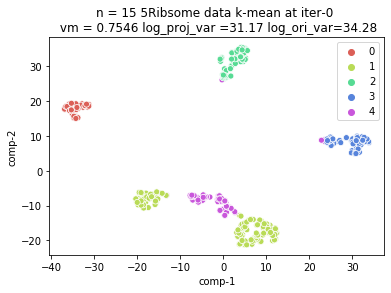

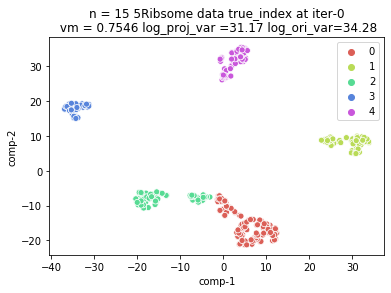

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


generated


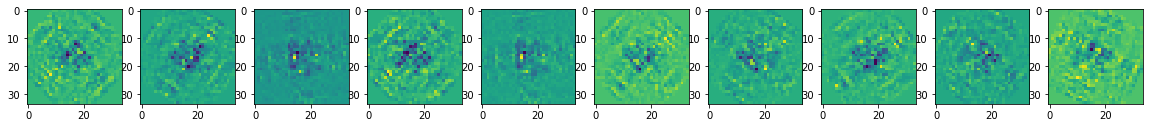

real


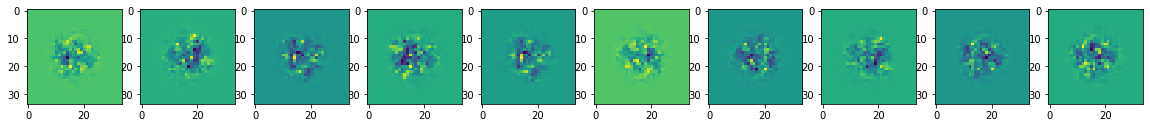

269.42738342285156 sec
0 batch 1 iteration
generated


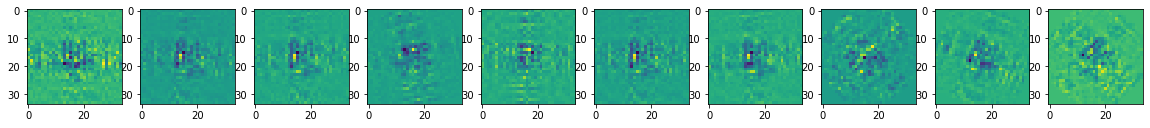

real


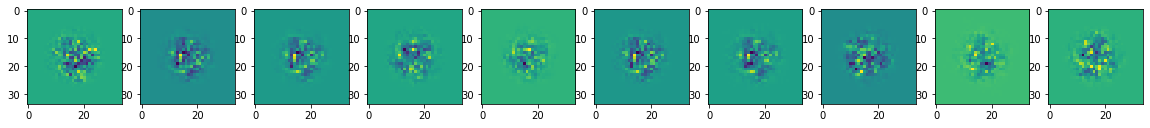

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 400 samples in 0.002s...
[t-SNE] Computed neighbors for 400 samples in 0.020s...
[t-SNE] Computed conditional probabilities for sample 400 / 400
[t-SNE] Mean sigma: 5.297269
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.332813
[t-SNE] KL divergence after 1000 iterations: 0.144633
self.All_U_kron_shape torch.Size([39304, 3375])
self.PCs.shape torch.Size([3375, 5])


/home/users/lewis841214/.conda/envs/protein_reconstruction/lib/python3.6/site-packages/ipykernel_launcher.py:522: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


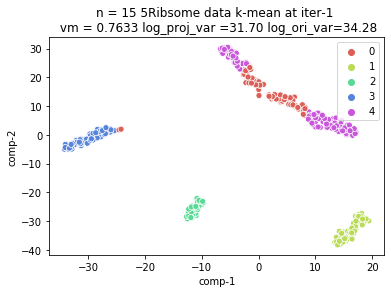

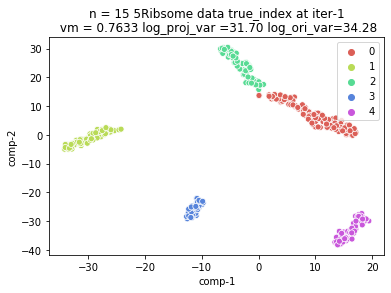

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


264.3077039718628 sec
0 batch 2 iteration
generated


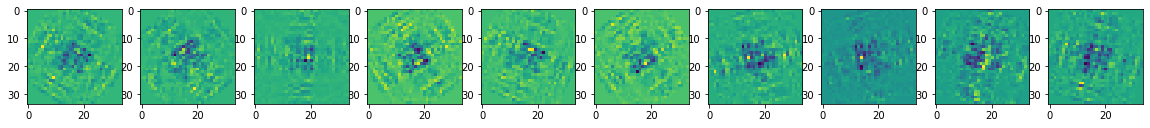

real


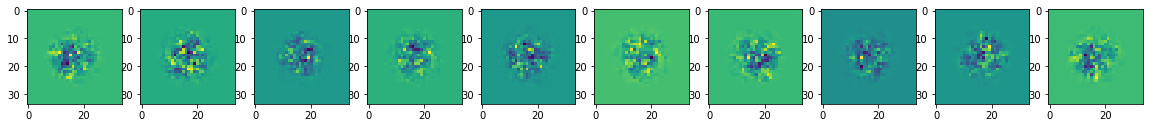

267.6162712574005 sec
0 batch 3 iteration
generated


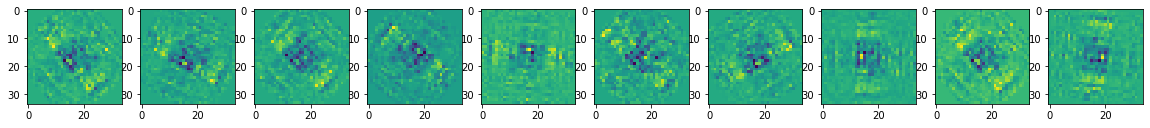

real


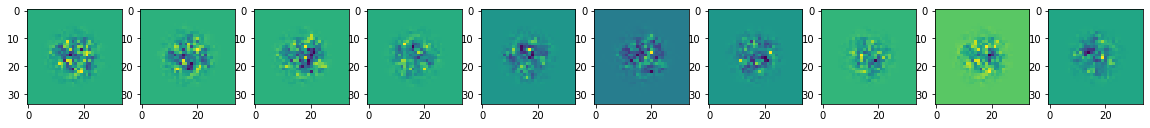

267.70671677589417 sec
0 batch 4 iteration
generated


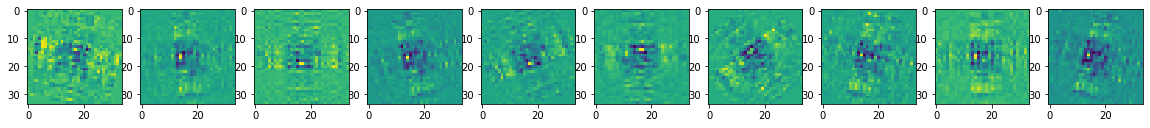

real


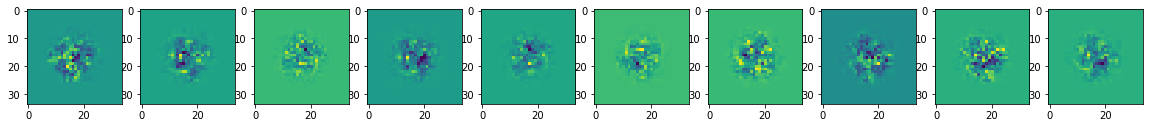

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 400 samples in 0.001s...
[t-SNE] Computed neighbors for 400 samples in 0.012s...
[t-SNE] Computed conditional probabilities for sample 400 / 400
[t-SNE] Mean sigma: 3.214689
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.380531
[t-SNE] KL divergence after 1000 iterations: 0.206317
self.All_U_kron_shape torch.Size([39304, 3375])
self.PCs.shape torch.Size([3375, 5])


/home/users/lewis841214/.conda/envs/protein_reconstruction/lib/python3.6/site-packages/ipykernel_launcher.py:522: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


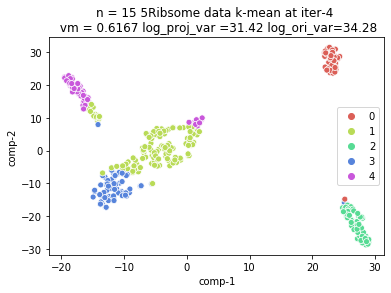

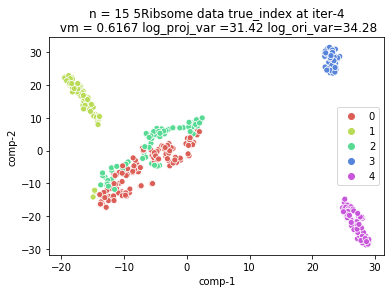

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


267.6416299343109 sec
0 batch 5 iteration
generated


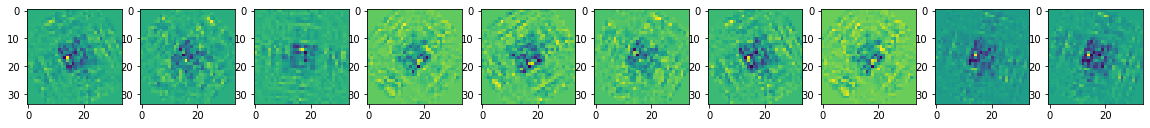

real


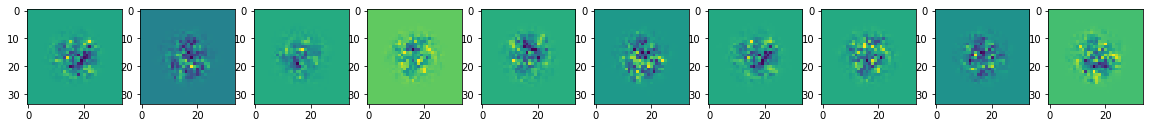

ratio / 5
267.28099727630615 sec
0 batch 6 iteration
generated


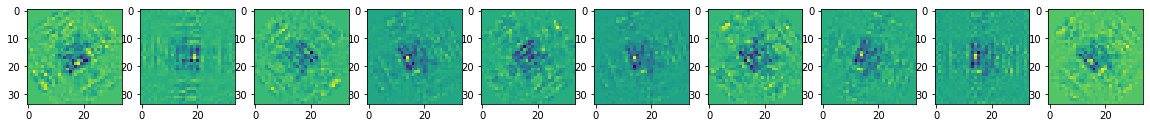

real


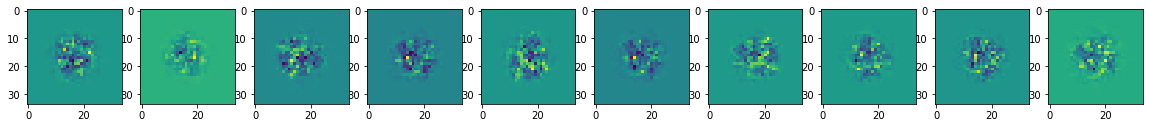

267.4646804332733 sec
0 batch 7 iteration
generated


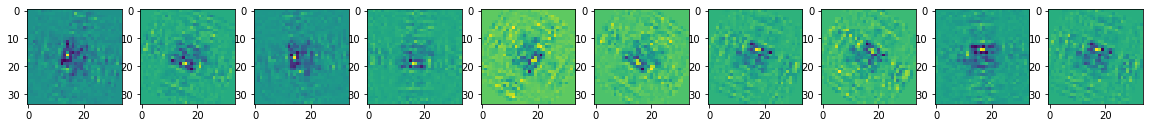

real


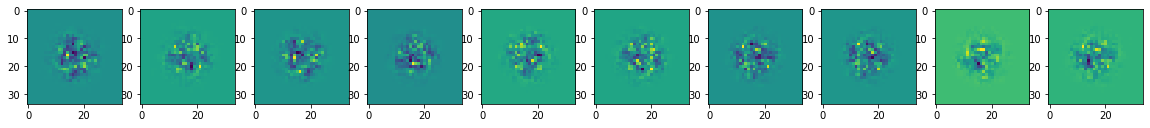

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 400 samples in 0.001s...
[t-SNE] Computed neighbors for 400 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 400 / 400
[t-SNE] Mean sigma: 4.014349
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.841103
[t-SNE] KL divergence after 1000 iterations: 0.166336
self.All_U_kron_shape torch.Size([39304, 3375])
self.PCs.shape torch.Size([3375, 5])


/home/users/lewis841214/.conda/envs/protein_reconstruction/lib/python3.6/site-packages/ipykernel_launcher.py:522: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


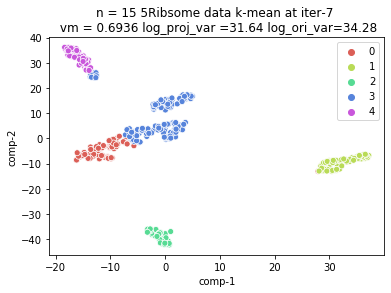

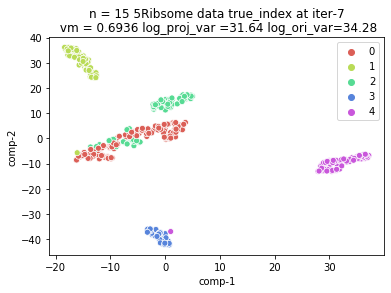

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


265.6208806037903 sec
0 batch 8 iteration
generated


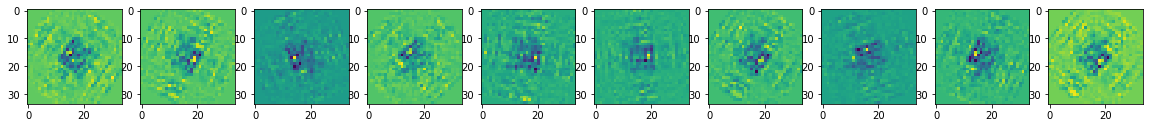

real


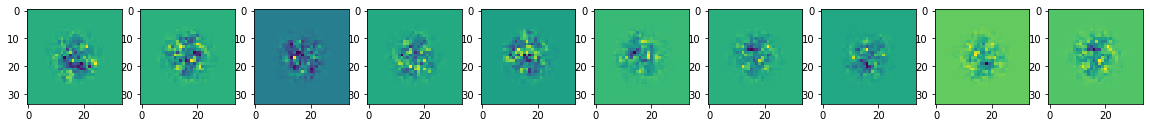

266.3542559146881 sec
0 batch 9 iteration
generated


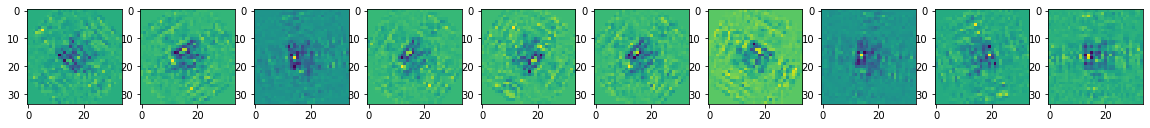

real


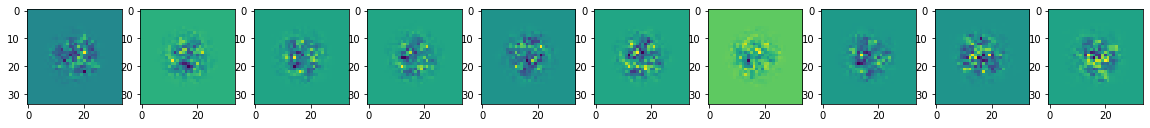

266.62559700012207 sec
0 batch 10 iteration
generated


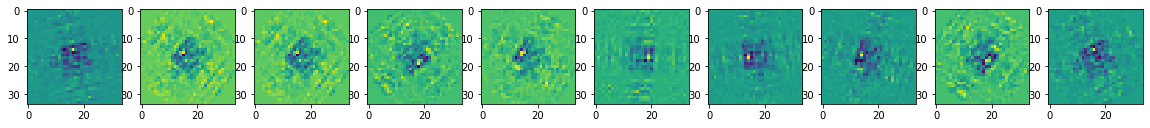

real


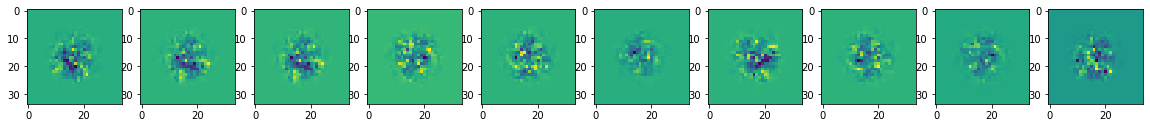

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 400 samples in 0.001s...
[t-SNE] Computed neighbors for 400 samples in 0.014s...
[t-SNE] Computed conditional probabilities for sample 400 / 400
[t-SNE] Mean sigma: 4.051209
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.858948
[t-SNE] KL divergence after 1000 iterations: 0.198520
self.All_U_kron_shape torch.Size([39304, 3375])
self.PCs.shape torch.Size([3375, 5])


/home/users/lewis841214/.conda/envs/protein_reconstruction/lib/python3.6/site-packages/ipykernel_launcher.py:522: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


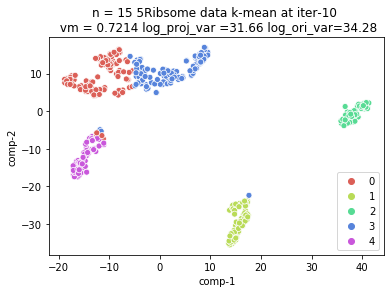

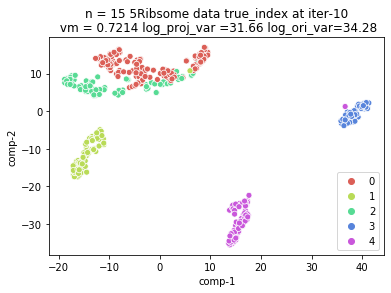

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


266.97683000564575 sec
0 batch 11 iteration
generated


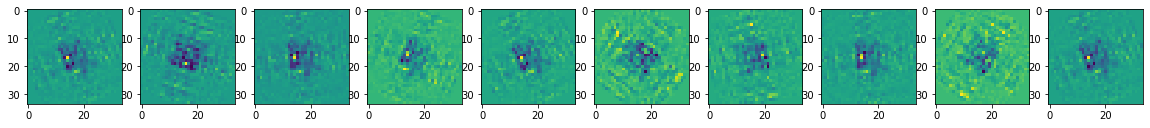

real


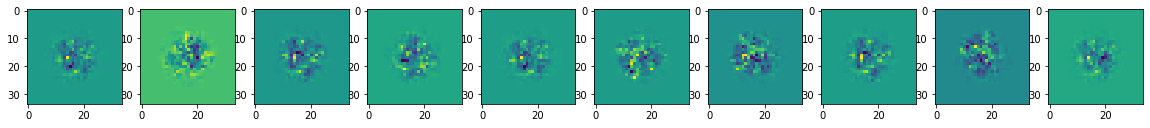

ratio / 5
266.75543236732483 sec
0 batch 12 iteration
generated


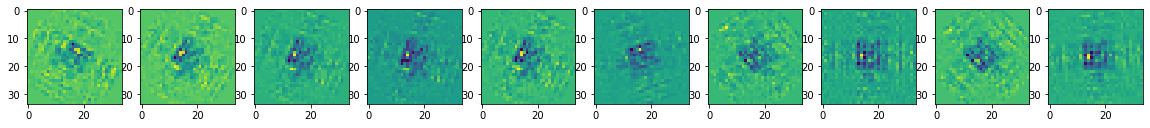

real


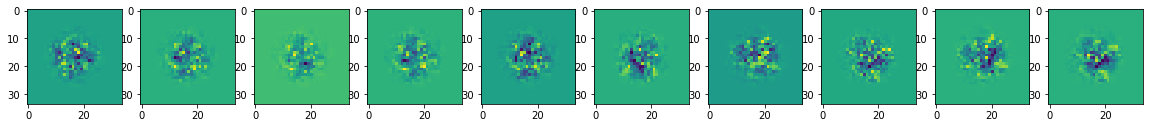

269.19451236724854 sec
0 batch 13 iteration
generated


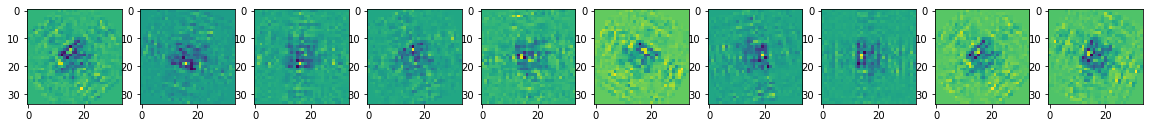

real


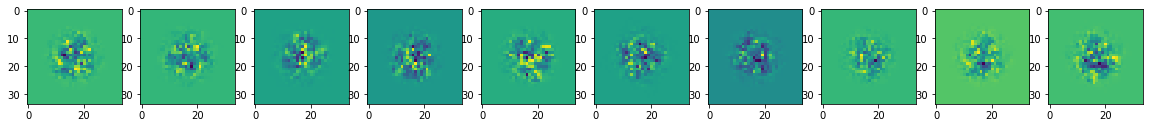

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 400 samples in 0.000s...
[t-SNE] Computed neighbors for 400 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 400 / 400
[t-SNE] Mean sigma: 4.208711
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.903381
[t-SNE] KL divergence after 1000 iterations: 0.181515
self.All_U_kron_shape torch.Size([39304, 3375])
self.PCs.shape torch.Size([3375, 5])


/home/users/lewis841214/.conda/envs/protein_reconstruction/lib/python3.6/site-packages/ipykernel_launcher.py:522: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


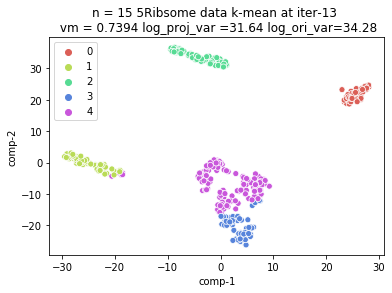

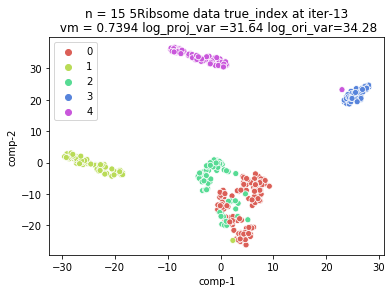

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


262.94912338256836 sec
0 batch 14 iteration
generated


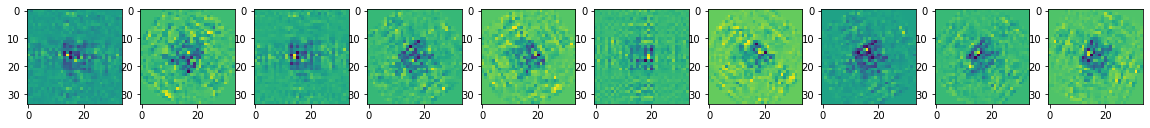

real


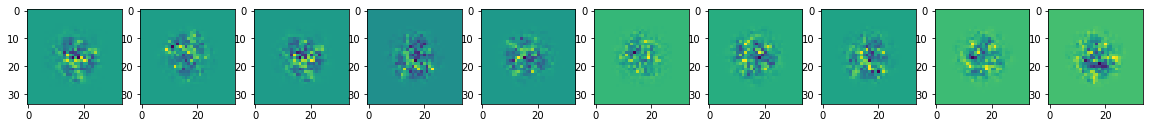

266.0686094760895 sec
0 batch 15 iteration
generated


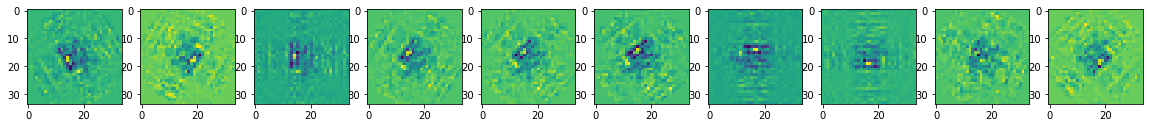

real


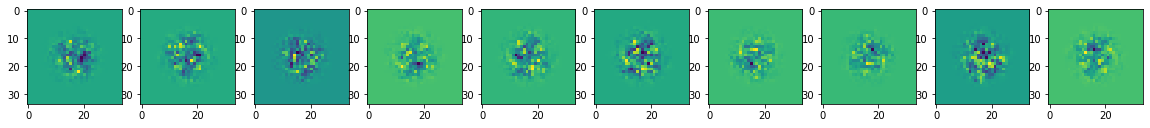

264.9105553627014 sec
0 batch 16 iteration
generated


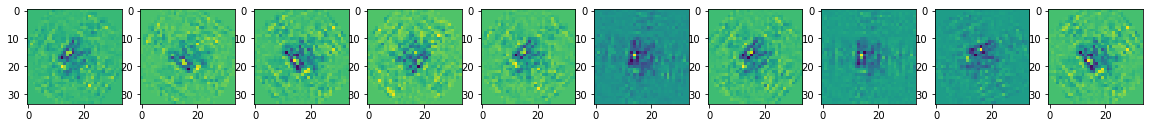

real


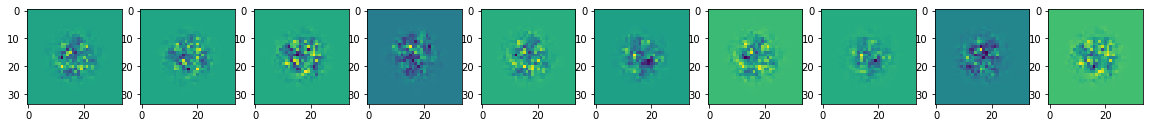

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 400 samples in 0.001s...
[t-SNE] Computed neighbors for 400 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 400 / 400
[t-SNE] Mean sigma: 4.099696
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.921581
[t-SNE] KL divergence after 1000 iterations: 0.203518
self.All_U_kron_shape torch.Size([39304, 3375])
self.PCs.shape torch.Size([3375, 5])


/home/users/lewis841214/.conda/envs/protein_reconstruction/lib/python3.6/site-packages/ipykernel_launcher.py:522: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


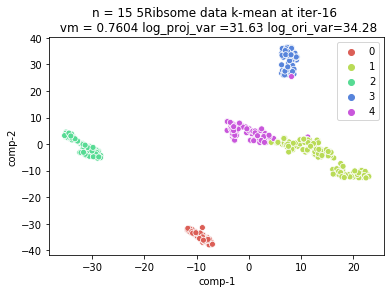

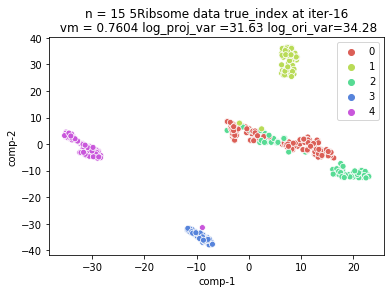

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


268.2118797302246 sec
0 batch 17 iteration
generated


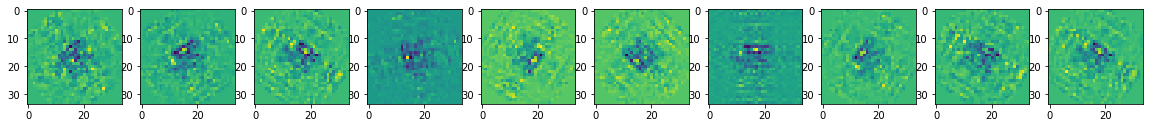

real


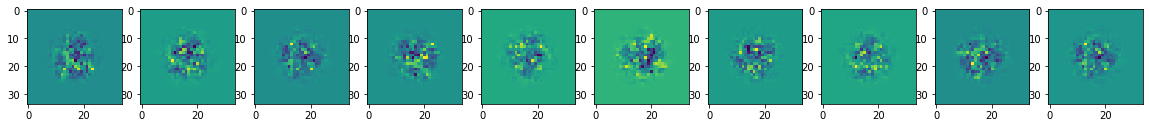

ratio / 5
268.7295002937317 sec
0 batch 18 iteration
generated


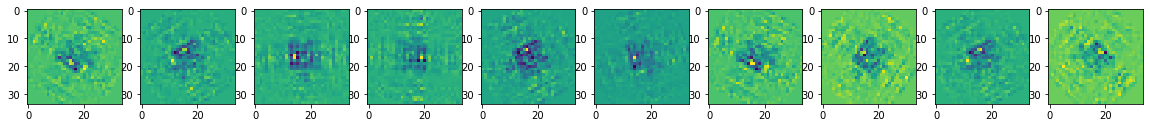

real


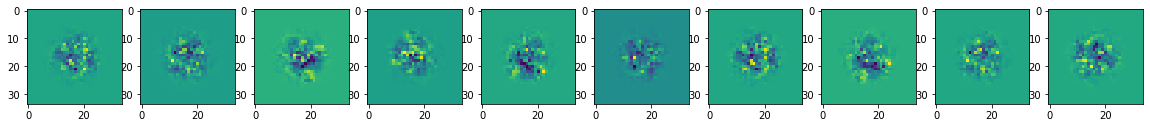

266.520072221756 sec
0 batch 19 iteration
generated


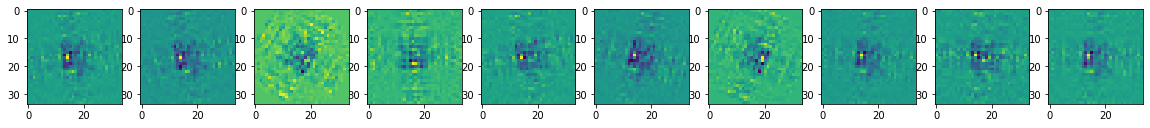

real


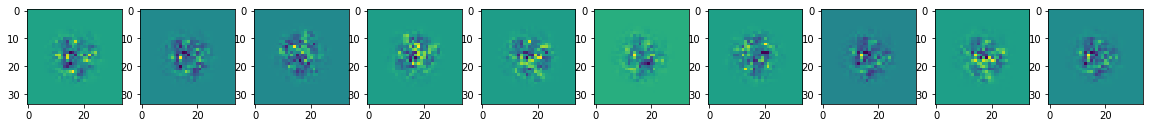

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 400 samples in 0.003s...
[t-SNE] Computed neighbors for 400 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 400 / 400
[t-SNE] Mean sigma: 4.371297
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.299614
[t-SNE] KL divergence after 1000 iterations: 0.186781
self.All_U_kron_shape torch.Size([39304, 3375])
self.PCs.shape torch.Size([3375, 5])


/home/users/lewis841214/.conda/envs/protein_reconstruction/lib/python3.6/site-packages/ipykernel_launcher.py:522: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


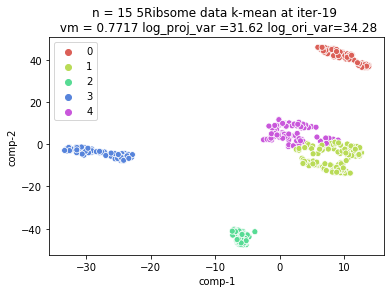

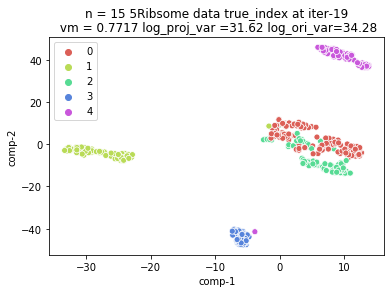

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


265.64377880096436 sec
0 batch 20 iteration
generated


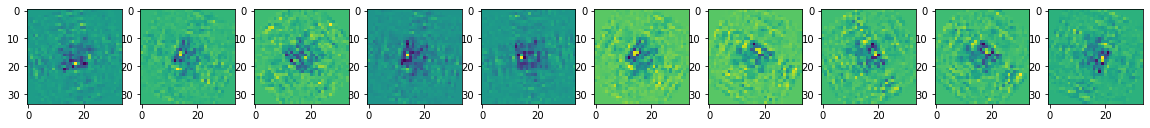

real


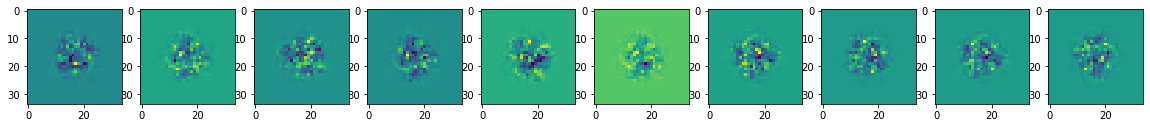

263.0604817867279 sec
0 batch 21 iteration
generated


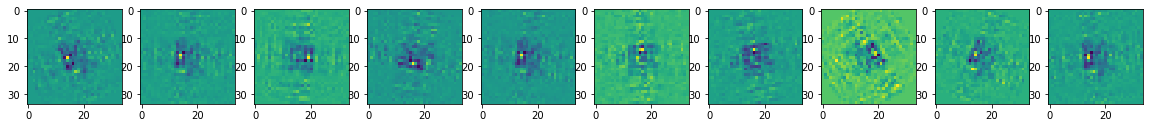

real


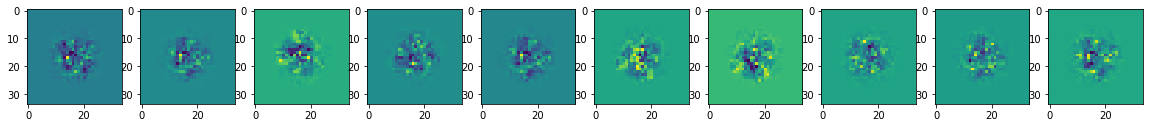

266.07495284080505 sec
0 batch 22 iteration
generated


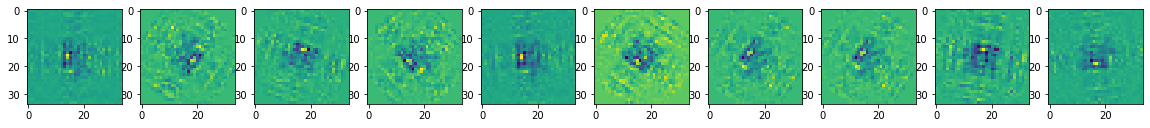

real


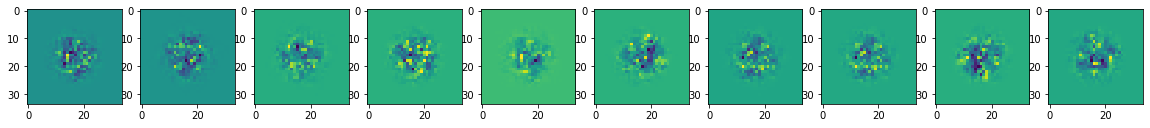

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 400 samples in 0.001s...
[t-SNE] Computed neighbors for 400 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 400 / 400
[t-SNE] Mean sigma: 4.397021
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.355293
[t-SNE] KL divergence after 1000 iterations: 0.180819
self.All_U_kron_shape torch.Size([39304, 3375])
self.PCs.shape torch.Size([3375, 5])


/home/users/lewis841214/.conda/envs/protein_reconstruction/lib/python3.6/site-packages/ipykernel_launcher.py:522: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


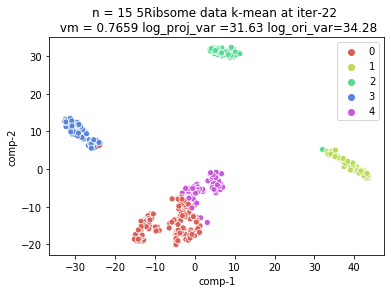

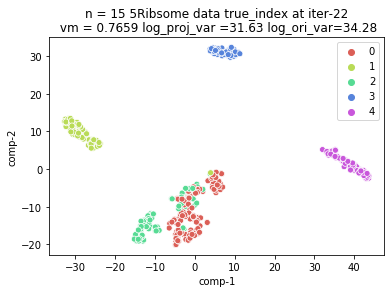

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


265.97329902648926 sec
0 batch 23 iteration
generated


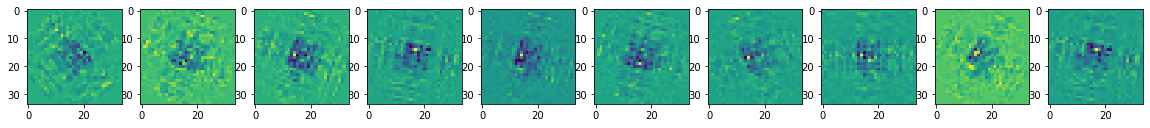

real


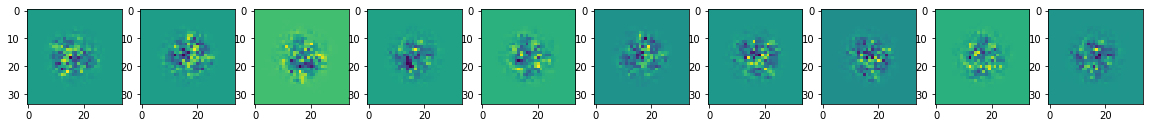

ratio / 5
267.2409579753876 sec
0 batch 24 iteration
generated


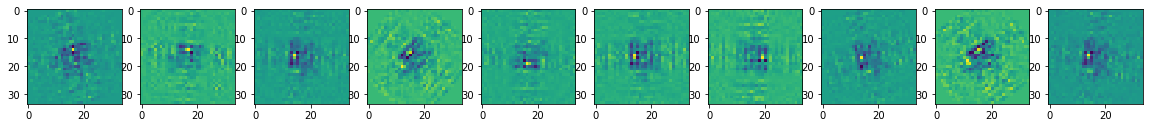

real


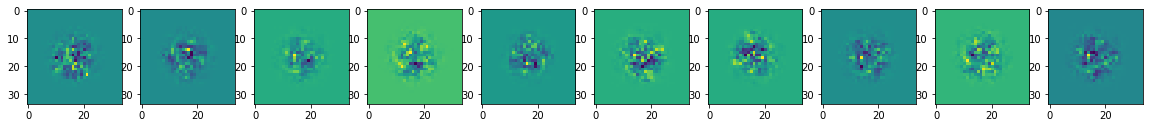

270.15267395973206 sec
0 batch 25 iteration
generated


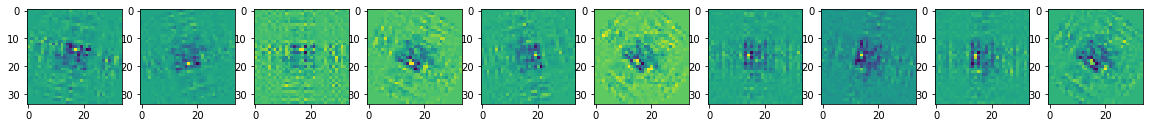

real


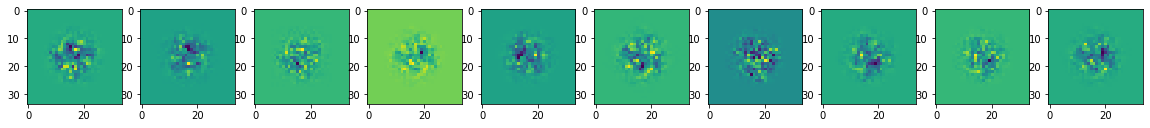

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 400 samples in 0.001s...
[t-SNE] Computed neighbors for 400 samples in 0.014s...
[t-SNE] Computed conditional probabilities for sample 400 / 400
[t-SNE] Mean sigma: 4.357004
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.458466
[t-SNE] KL divergence after 1000 iterations: 0.186944
self.All_U_kron_shape torch.Size([39304, 3375])
self.PCs.shape torch.Size([3375, 5])


/home/users/lewis841214/.conda/envs/protein_reconstruction/lib/python3.6/site-packages/ipykernel_launcher.py:522: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


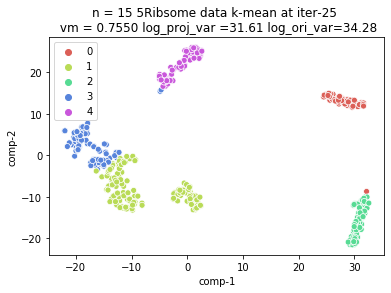

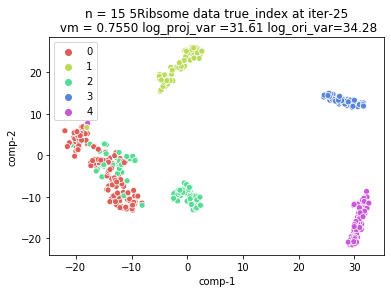

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


265.82948637008667 sec
0 batch 26 iteration
generated


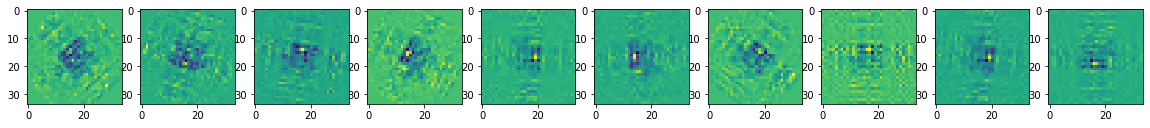

real


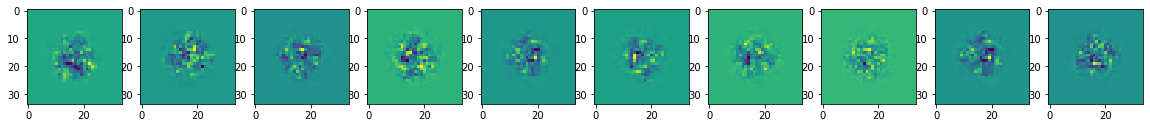

268.2151505947113 sec
0 batch 27 iteration
generated


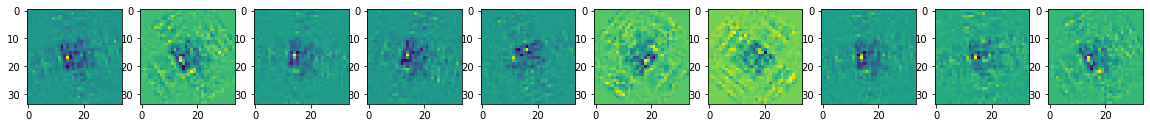

real


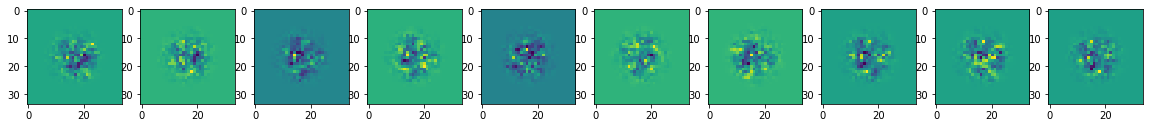

263.3959231376648 sec
0 batch 28 iteration
generated


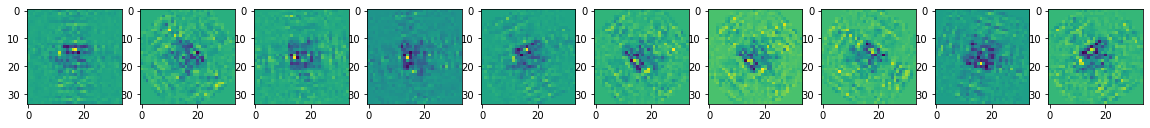

real


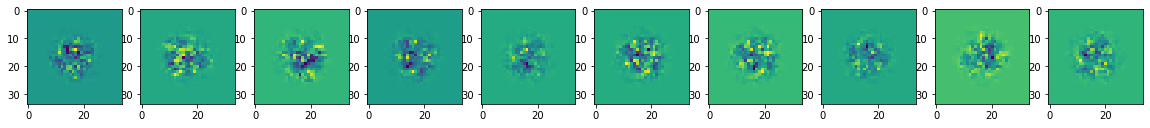

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 400 samples in 0.002s...
[t-SNE] Computed neighbors for 400 samples in 0.018s...
[t-SNE] Computed conditional probabilities for sample 400 / 400
[t-SNE] Mean sigma: 4.743636
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.354084
[t-SNE] KL divergence after 1000 iterations: 0.193046
self.All_U_kron_shape torch.Size([39304, 3375])
self.PCs.shape torch.Size([3375, 5])


/home/users/lewis841214/.conda/envs/protein_reconstruction/lib/python3.6/site-packages/ipykernel_launcher.py:522: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


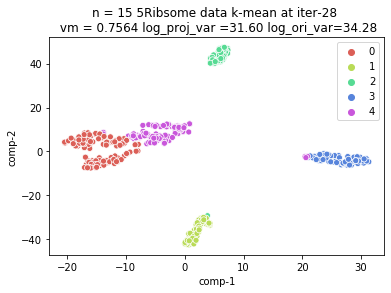

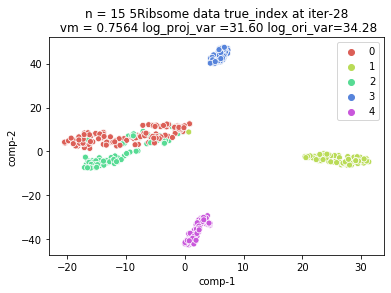

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


265.7663474082947 sec
0 batch 29 iteration
generated


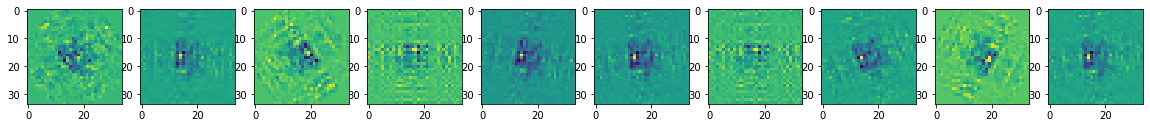

real


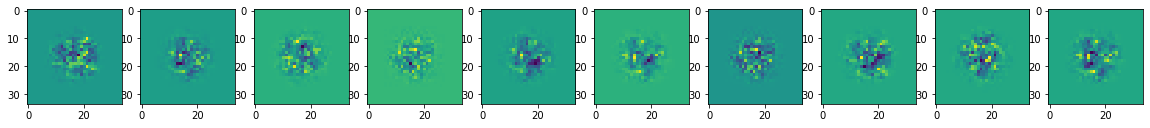

ratio / 5
261.8196930885315 sec
0 batch 30 iteration
generated


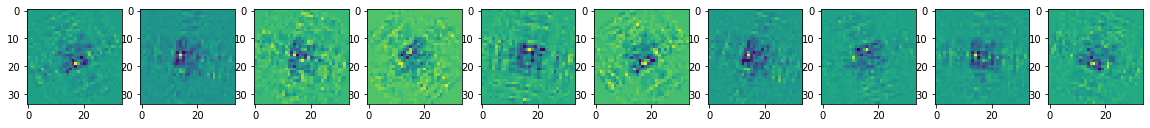

real


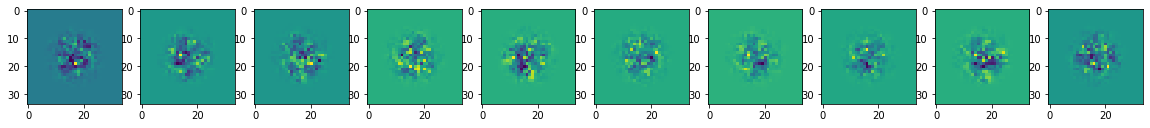

266.5491166114807 sec
0 batch 31 iteration
generated


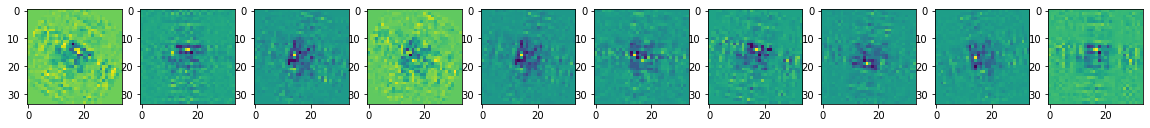

real


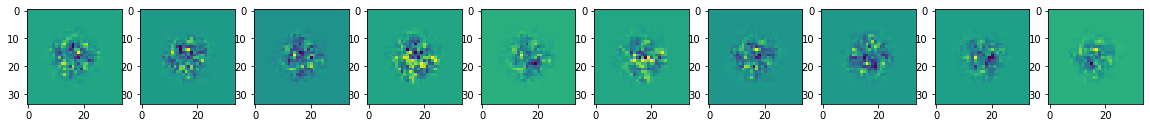

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 400 samples in 0.000s...
[t-SNE] Computed neighbors for 400 samples in 0.014s...
[t-SNE] Computed conditional probabilities for sample 400 / 400
[t-SNE] Mean sigma: 4.390880
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.099667
[t-SNE] KL divergence after 1000 iterations: 0.186192
self.All_U_kron_shape torch.Size([39304, 3375])
self.PCs.shape torch.Size([3375, 5])


/home/users/lewis841214/.conda/envs/protein_reconstruction/lib/python3.6/site-packages/ipykernel_launcher.py:522: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


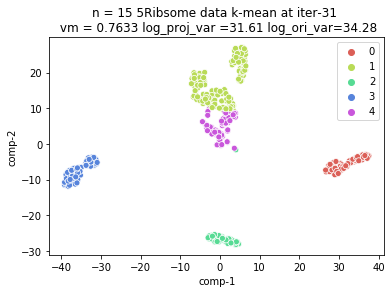

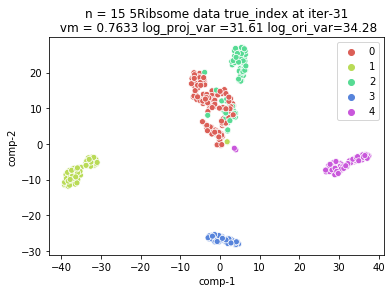

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


266.86769104003906 sec
0 batch 32 iteration
generated


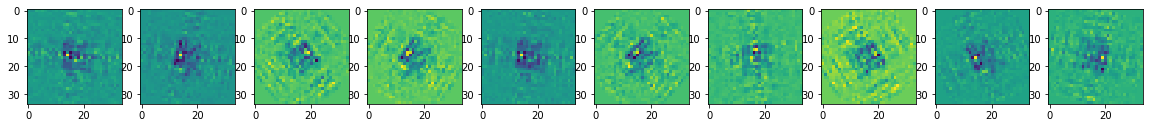

real


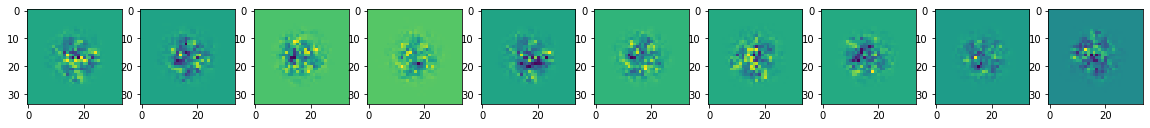

264.36790919303894 sec
0 batch 33 iteration
generated


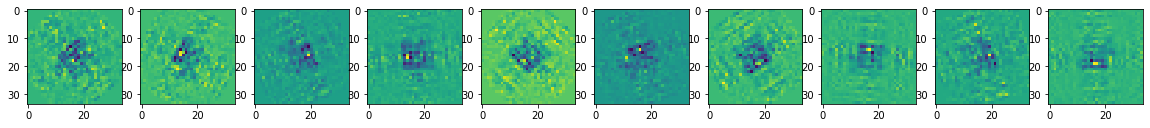

real


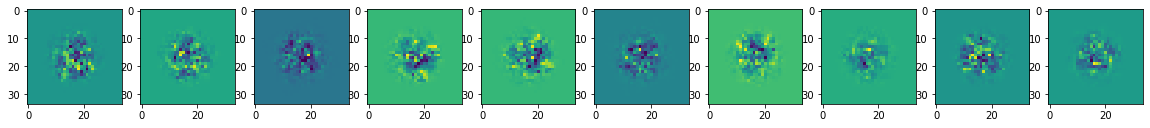

263.98832964897156 sec
0 batch 34 iteration
generated


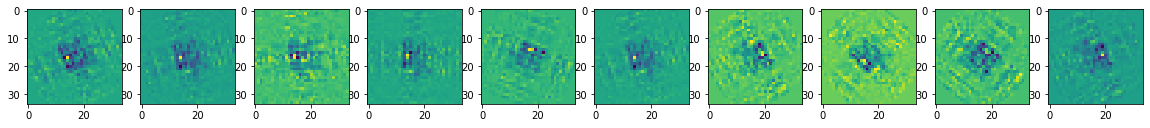

real


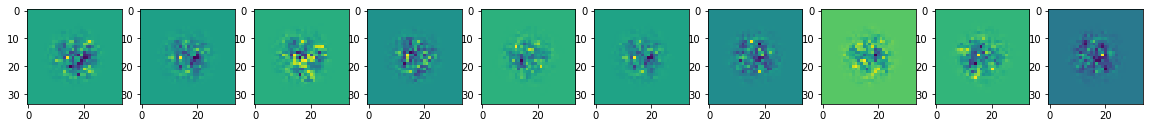

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 400 samples in 0.001s...
[t-SNE] Computed neighbors for 400 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 400 / 400
[t-SNE] Mean sigma: 4.633455
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.555355
[t-SNE] KL divergence after 1000 iterations: 0.193504
self.All_U_kron_shape torch.Size([39304, 3375])
self.PCs.shape torch.Size([3375, 5])


/home/users/lewis841214/.conda/envs/protein_reconstruction/lib/python3.6/site-packages/ipykernel_launcher.py:522: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


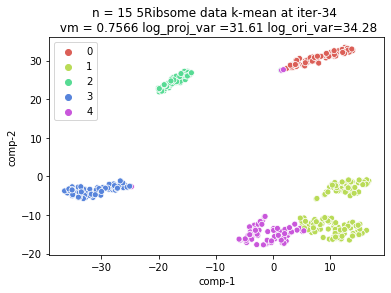

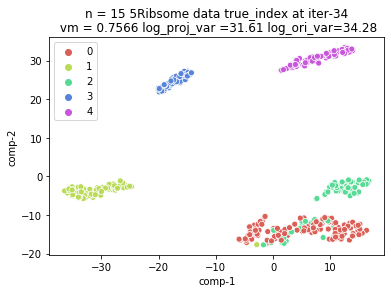

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


265.61395168304443 sec
0 batch 35 iteration
generated


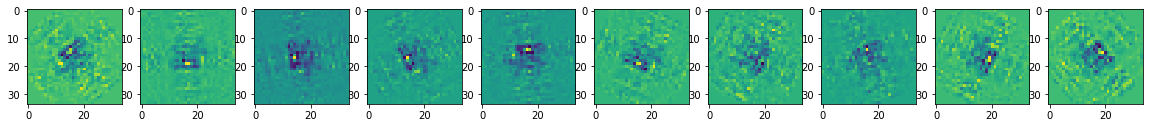

real


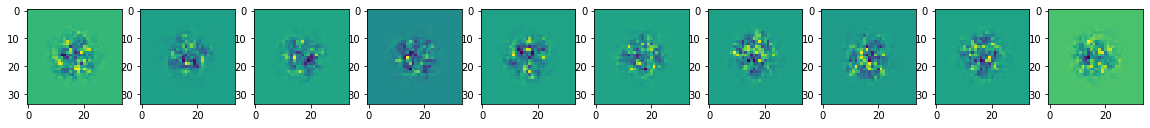

ratio / 5
265.95075273513794 sec
0 batch 36 iteration
generated


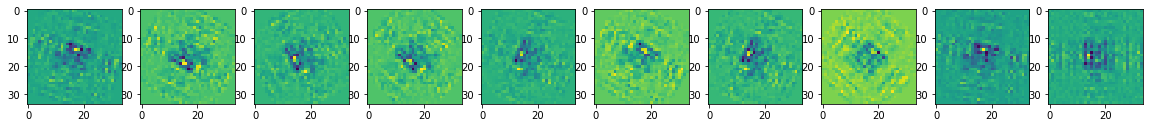

real


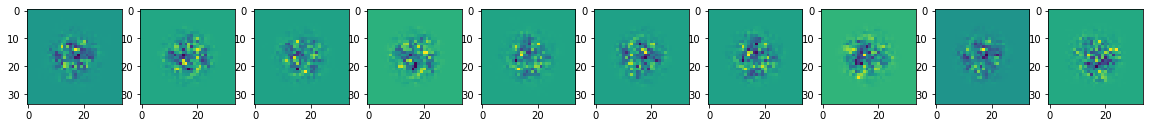

264.48178005218506 sec
0 batch 37 iteration
generated


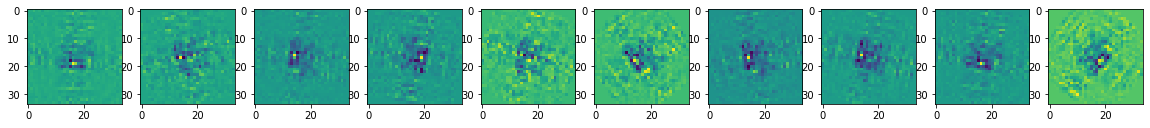

real


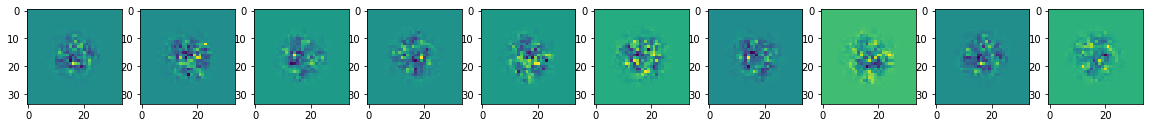

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 400 samples in 0.000s...
[t-SNE] Computed neighbors for 400 samples in 0.013s...
[t-SNE] Computed conditional probabilities for sample 400 / 400
[t-SNE] Mean sigma: 4.751991
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.256794
[t-SNE] KL divergence after 1000 iterations: 0.188925
self.All_U_kron_shape torch.Size([39304, 3375])
self.PCs.shape torch.Size([3375, 5])


/home/users/lewis841214/.conda/envs/protein_reconstruction/lib/python3.6/site-packages/ipykernel_launcher.py:522: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


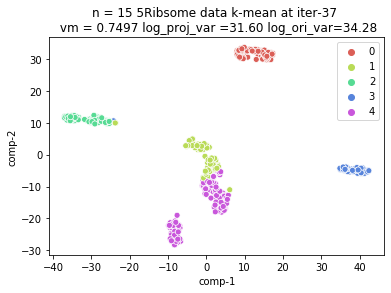

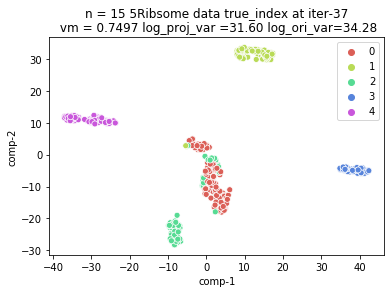

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


263.56353998184204 sec
0 batch 38 iteration
generated


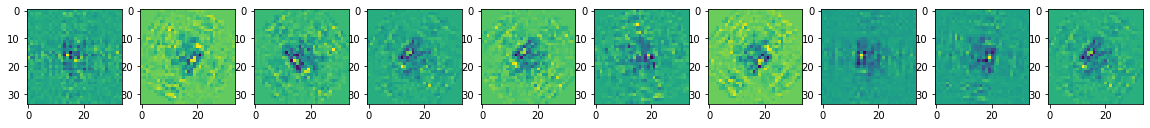

real


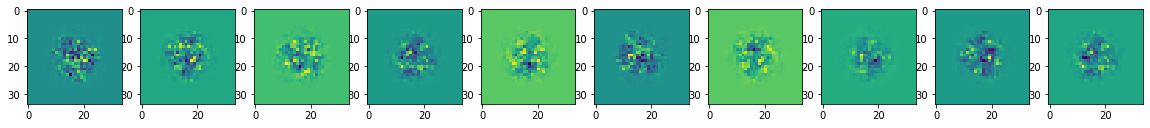

265.738609790802 sec
0 batch 39 iteration
generated


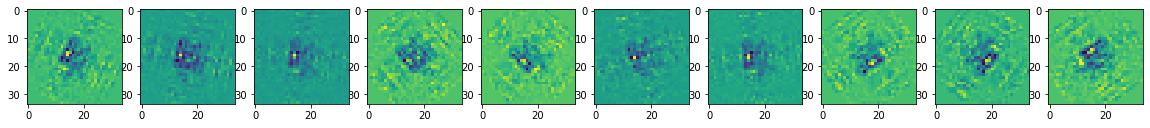

real


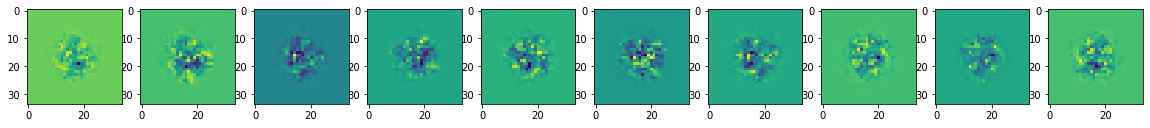

268.16402649879456 sec
0 batch 40 iteration
generated


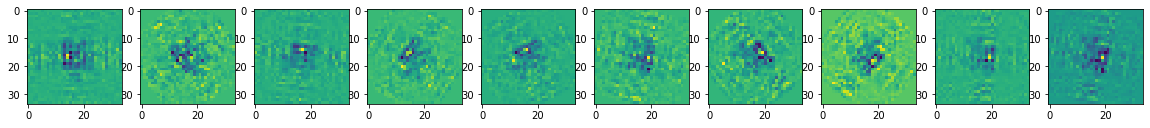

real


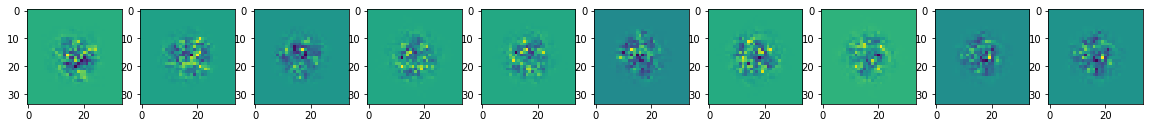

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 400 samples in 0.001s...
[t-SNE] Computed neighbors for 400 samples in 0.010s...
[t-SNE] Computed conditional probabilities for sample 400 / 400
[t-SNE] Mean sigma: 4.273972
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.207218
[t-SNE] KL divergence after 1000 iterations: 0.184217
self.All_U_kron_shape torch.Size([39304, 3375])
self.PCs.shape torch.Size([3375, 5])


/home/users/lewis841214/.conda/envs/protein_reconstruction/lib/python3.6/site-packages/ipykernel_launcher.py:522: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


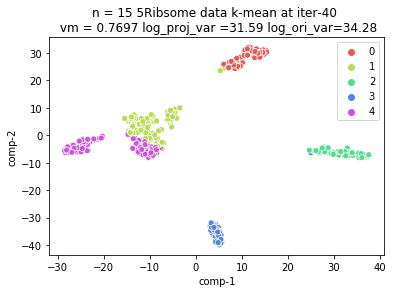

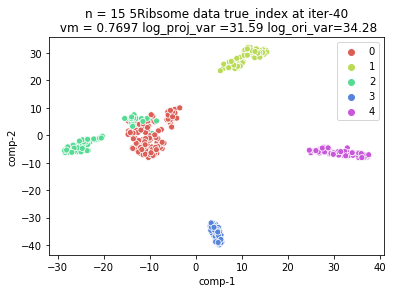

the 0 th iter


/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 400 samples in 0.000s...
[t-SNE] Computed neighbors for 400 samples in 0.009s...
[t-SNE] Computed conditional probabilities for sample 400 / 400
[t-SNE] Mean sigma: 4.273972
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.372986
[t-SNE] KL divergence after 1000 iterations: 0.194452
self.All_U_kron_shape torch.Size([39304, 3375])
self.PCs.shape torch.Size([3375, 5])


/home/users/lewis841214/.conda/envs/protein_reconstruction/lib/python3.6/site-packages/ipykernel_launcher.py:522: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


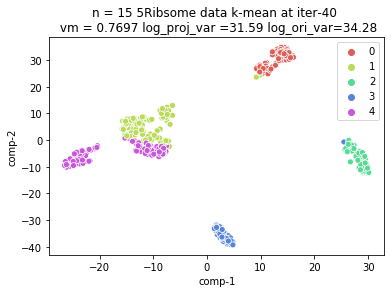

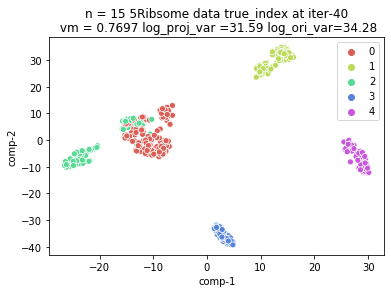

(9200, 34, 34)


/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 400 samples in 0.001s...
[t-SNE] Computed neighbors for 400 samples in 0.009s...
[t-SNE] Computed conditional probabilities for sample 400 / 400
[t-SNE] Mean sigma: 8.802716
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.581543
[t-SNE] KL divergence after 1000 iterations: 0.150929
self.All_U_kron_shape torch.Size([39304, 5832])
self.PCs.shape torch.Size([5832, 5])


/home/users/lewis841214/.conda/envs/protein_reconstruction/lib/python3.6/site-packages/ipykernel_launcher.py:522: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


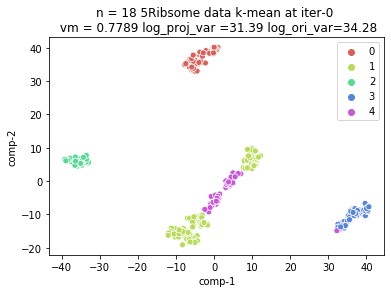

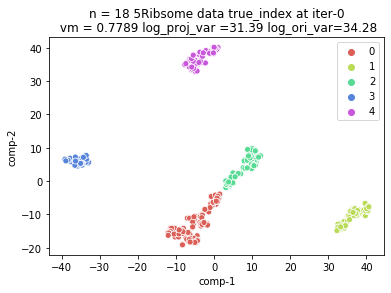

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


generated


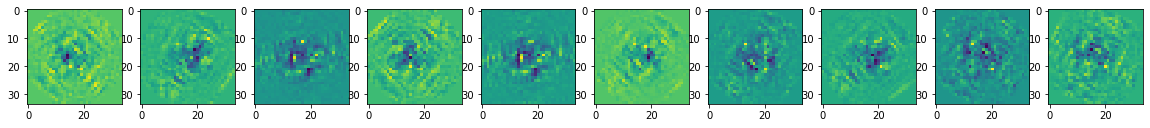

real


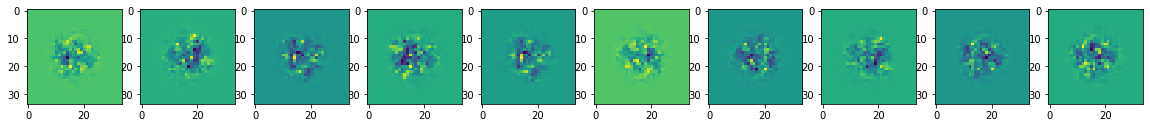

509.32780027389526 sec
0 batch 1 iteration
generated


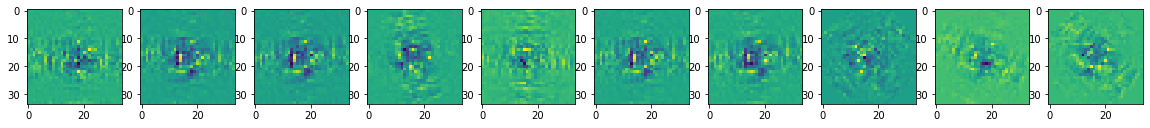

real


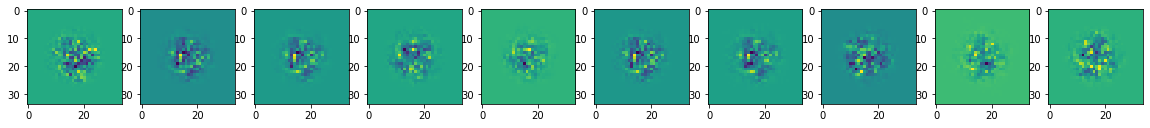

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 400 samples in 0.002s...
[t-SNE] Computed neighbors for 400 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 400 / 400
[t-SNE] Mean sigma: 5.001648
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.581902
[t-SNE] KL divergence after 1000 iterations: 0.128776
self.All_U_kron_shape torch.Size([39304, 5832])
self.PCs.shape torch.Size([5832, 5])


/home/users/lewis841214/.conda/envs/protein_reconstruction/lib/python3.6/site-packages/ipykernel_launcher.py:522: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


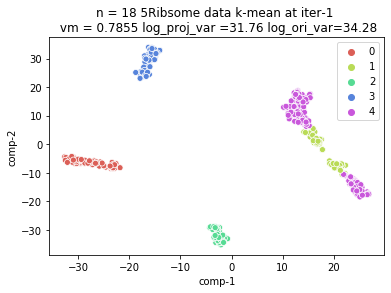

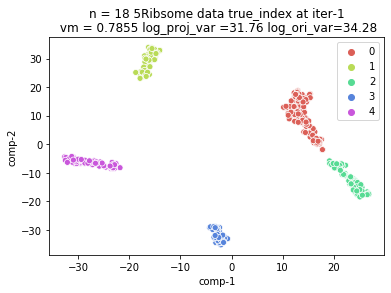

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


514.3977069854736 sec
0 batch 2 iteration
generated


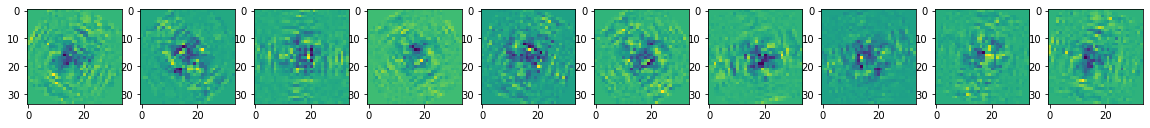

real


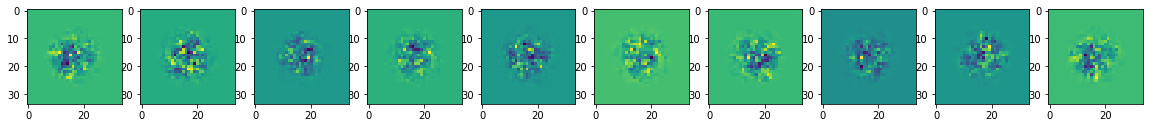

514.9642252922058 sec
0 batch 3 iteration
generated


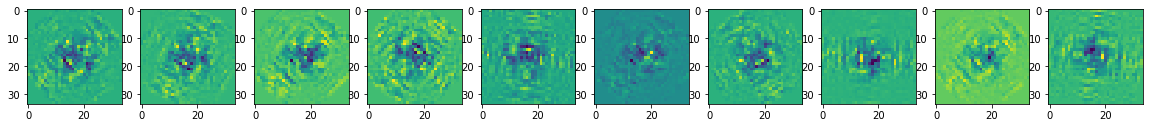

real


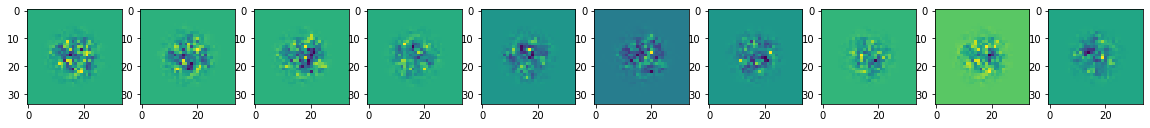

517.2221183776855 sec
0 batch 4 iteration
generated


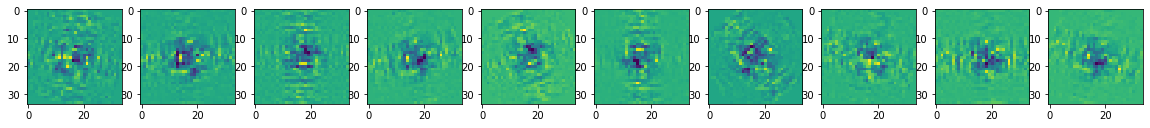

real


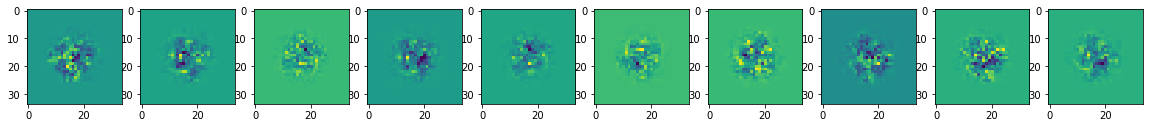

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 400 samples in 0.002s...
[t-SNE] Computed neighbors for 400 samples in 0.012s...
[t-SNE] Computed conditional probabilities for sample 400 / 400
[t-SNE] Mean sigma: 4.213643
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.894108
[t-SNE] KL divergence after 1000 iterations: 0.147000
self.All_U_kron_shape torch.Size([39304, 5832])
self.PCs.shape torch.Size([5832, 5])


/home/users/lewis841214/.conda/envs/protein_reconstruction/lib/python3.6/site-packages/ipykernel_launcher.py:522: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


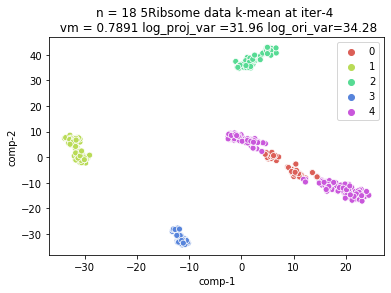

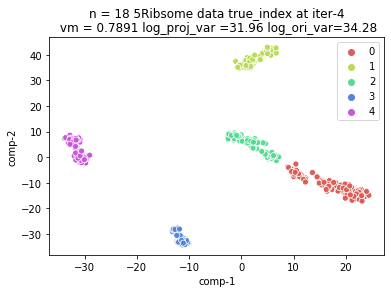

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


517.2045443058014 sec
0 batch 5 iteration
generated


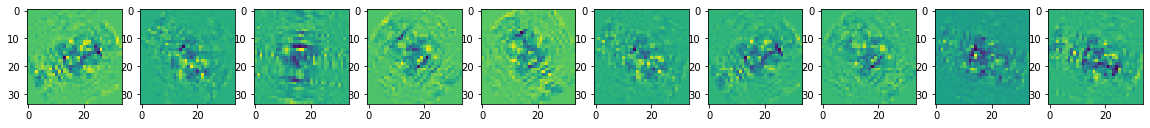

real


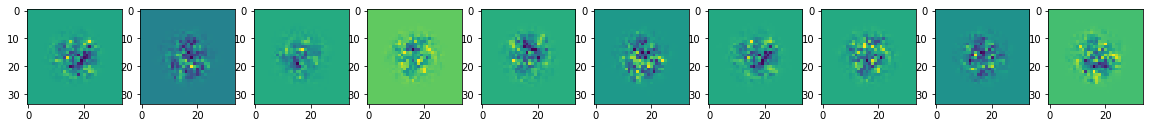

ratio / 5
517.9181661605835 sec
0 batch 6 iteration
generated


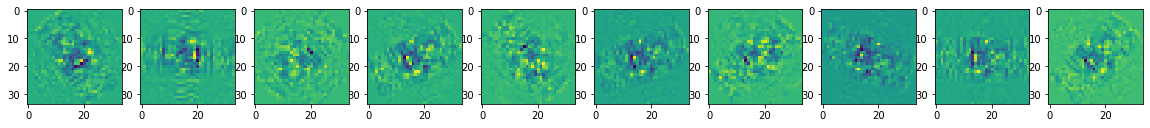

real


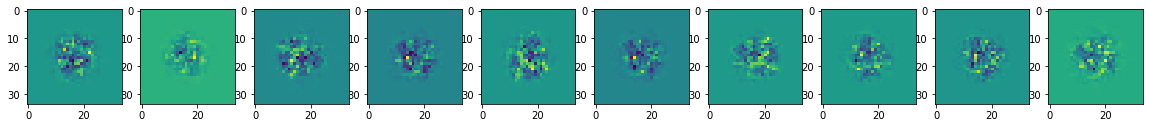

516.8840162754059 sec
0 batch 7 iteration
generated


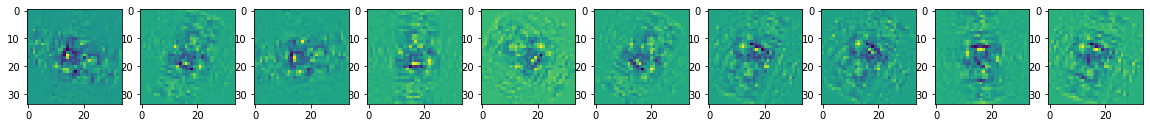

real


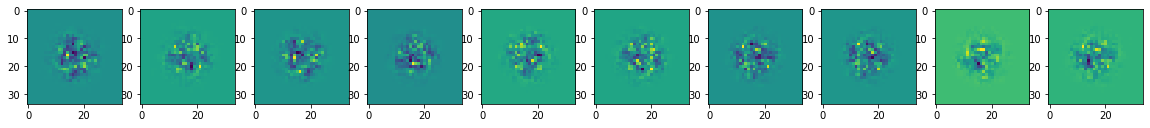

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 400 samples in 0.000s...
[t-SNE] Computed neighbors for 400 samples in 0.010s...
[t-SNE] Computed conditional probabilities for sample 400 / 400
[t-SNE] Mean sigma: 4.446202
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.360813
[t-SNE] KL divergence after 1000 iterations: 0.167715
self.All_U_kron_shape torch.Size([39304, 5832])
self.PCs.shape torch.Size([5832, 5])


/home/users/lewis841214/.conda/envs/protein_reconstruction/lib/python3.6/site-packages/ipykernel_launcher.py:522: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


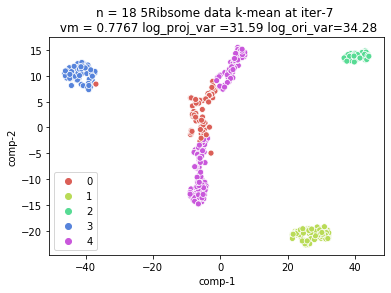

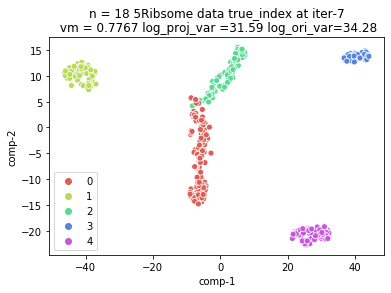

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


516.4454793930054 sec
0 batch 8 iteration
generated


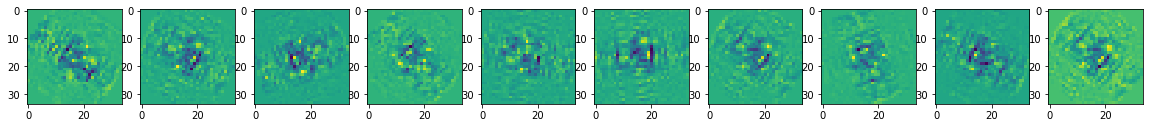

real


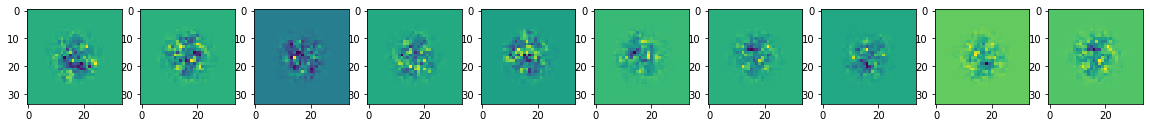

509.69577169418335 sec
0 batch 9 iteration
generated


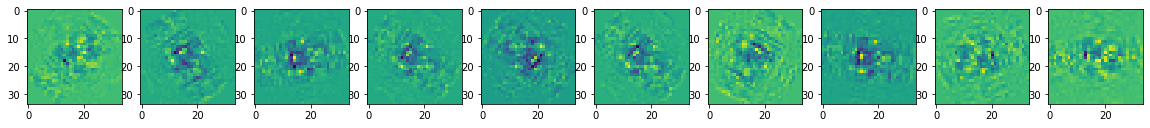

real


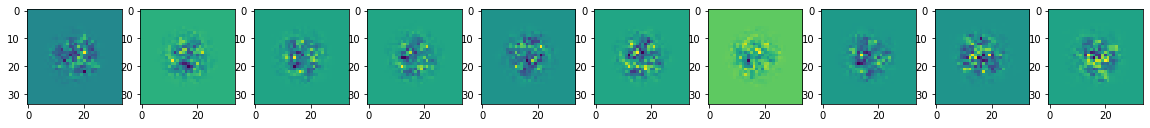

513.8536717891693 sec
0 batch 10 iteration
generated


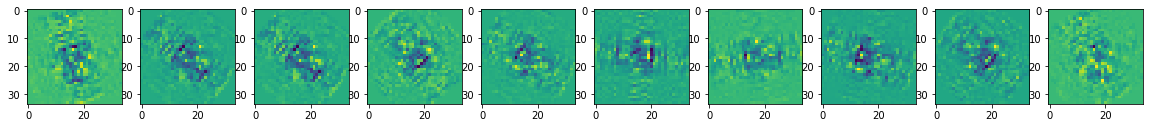

real


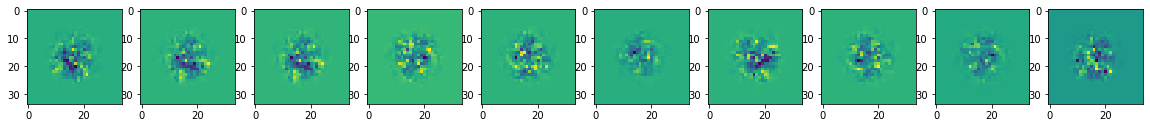

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 400 samples in 0.002s...
[t-SNE] Computed neighbors for 400 samples in 0.017s...
[t-SNE] Computed conditional probabilities for sample 400 / 400
[t-SNE] Mean sigma: 4.617611
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.783703
[t-SNE] KL divergence after 1000 iterations: 0.153020
self.All_U_kron_shape torch.Size([39304, 5832])
self.PCs.shape torch.Size([5832, 5])


/home/users/lewis841214/.conda/envs/protein_reconstruction/lib/python3.6/site-packages/ipykernel_launcher.py:522: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


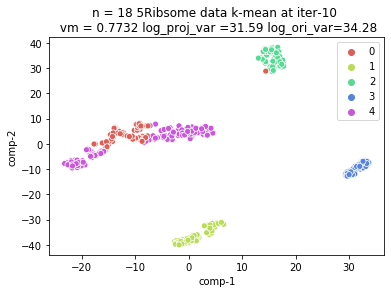

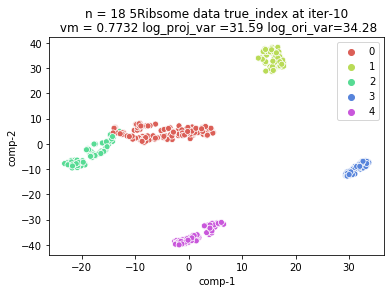

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


510.5265083312988 sec
0 batch 11 iteration
generated


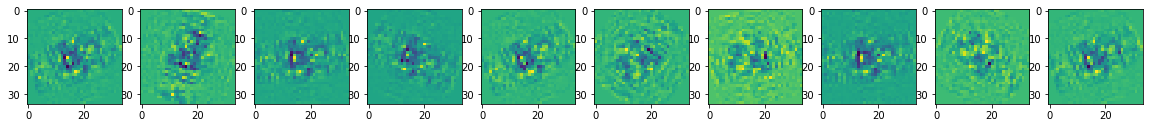

real


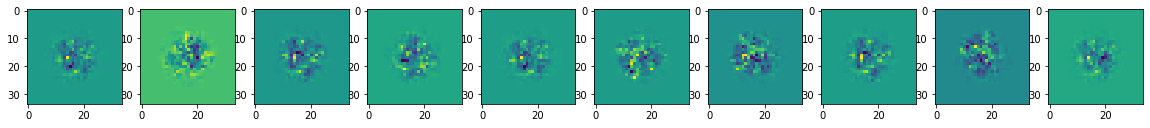

ratio / 5
511.61307096481323 sec
0 batch 12 iteration
generated


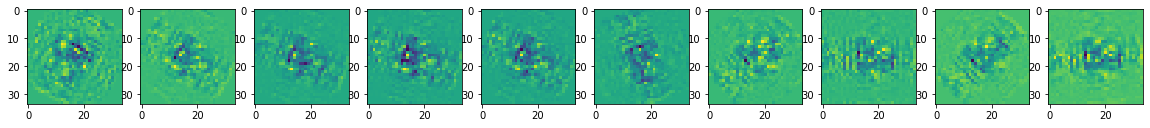

real


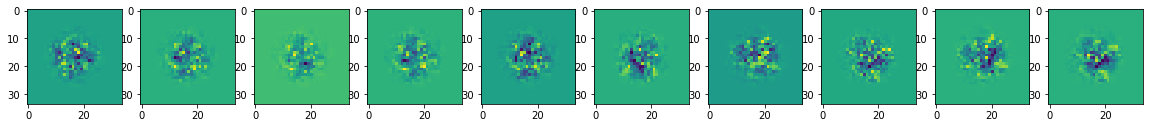

517.137903213501 sec
0 batch 13 iteration
generated


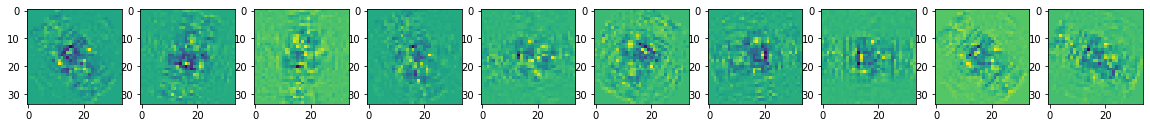

real


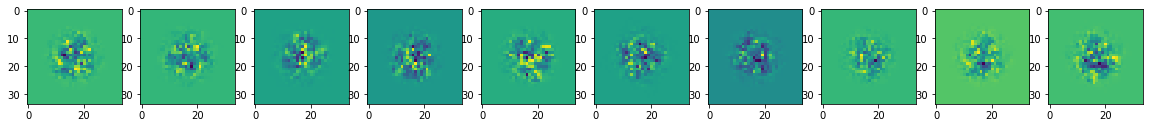

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 400 samples in 0.002s...
[t-SNE] Computed neighbors for 400 samples in 0.011s...
[t-SNE] Computed conditional probabilities for sample 400 / 400
[t-SNE] Mean sigma: 4.491412
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.281712
[t-SNE] KL divergence after 1000 iterations: 0.193140
self.All_U_kron_shape torch.Size([39304, 5832])
self.PCs.shape torch.Size([5832, 5])


/home/users/lewis841214/.conda/envs/protein_reconstruction/lib/python3.6/site-packages/ipykernel_launcher.py:522: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


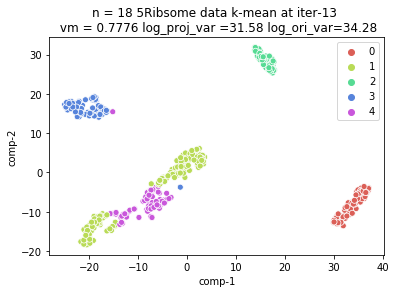

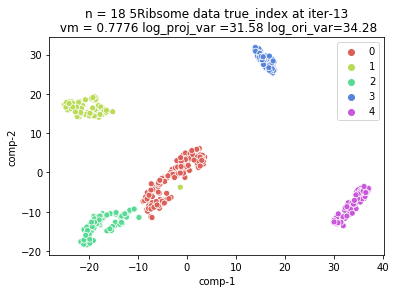

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


511.89141631126404 sec
0 batch 14 iteration
generated


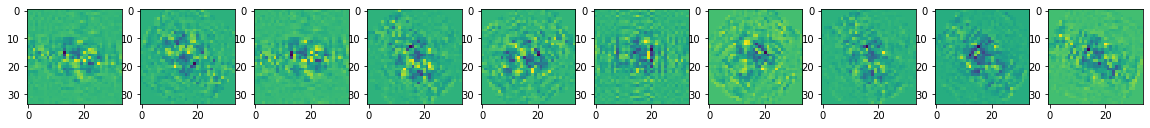

real


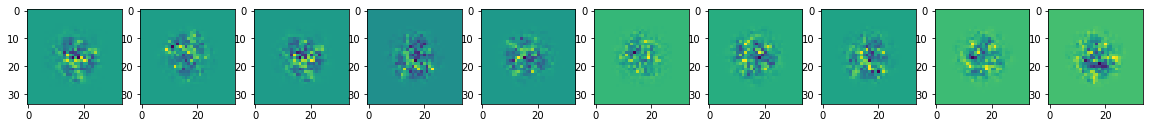

514.6401317119598 sec
0 batch 15 iteration
generated


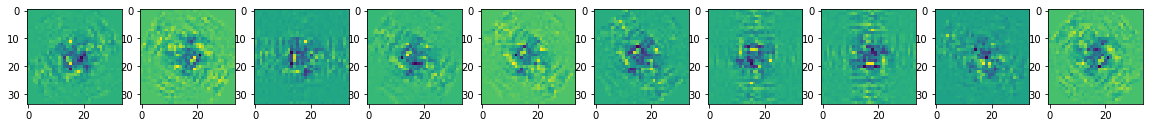

real


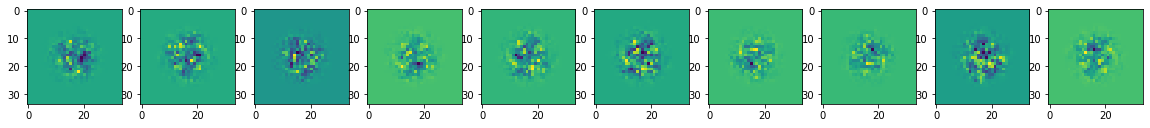

515.0717985630035 sec
0 batch 16 iteration
generated


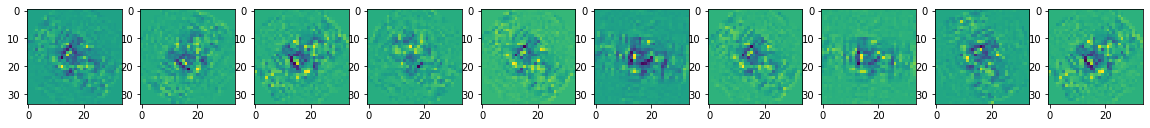

real


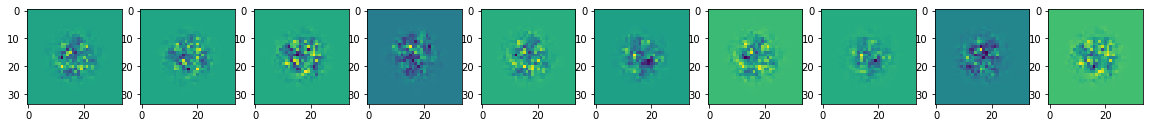

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 400 samples in 0.001s...
[t-SNE] Computed neighbors for 400 samples in 0.015s...
[t-SNE] Computed conditional probabilities for sample 400 / 400
[t-SNE] Mean sigma: 4.154306
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.263264
[t-SNE] KL divergence after 1000 iterations: 0.172518
self.All_U_kron_shape torch.Size([39304, 5832])
self.PCs.shape torch.Size([5832, 5])


/home/users/lewis841214/.conda/envs/protein_reconstruction/lib/python3.6/site-packages/ipykernel_launcher.py:522: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


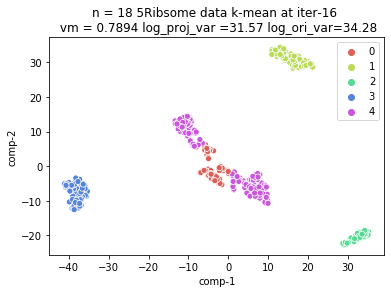

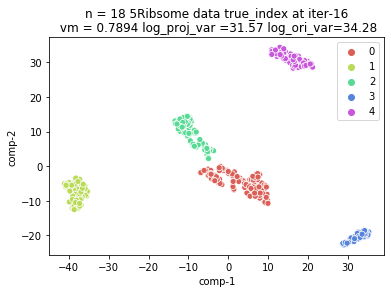

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


516.6543803215027 sec
0 batch 17 iteration
generated


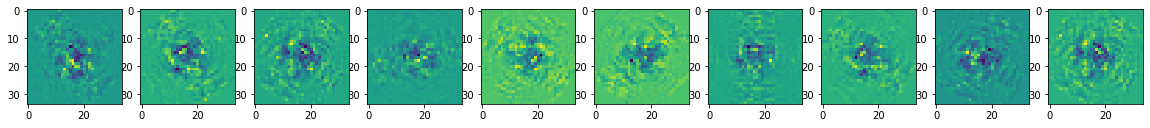

real


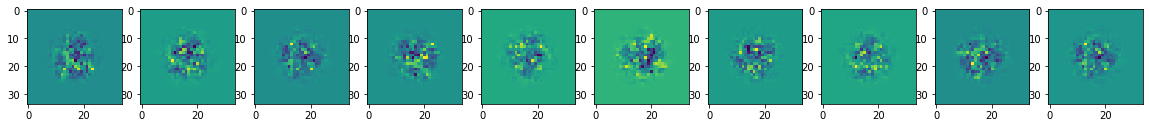

ratio / 5
520.9487400054932 sec
0 batch 18 iteration
generated


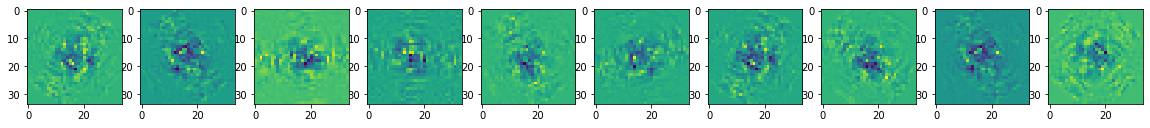

real


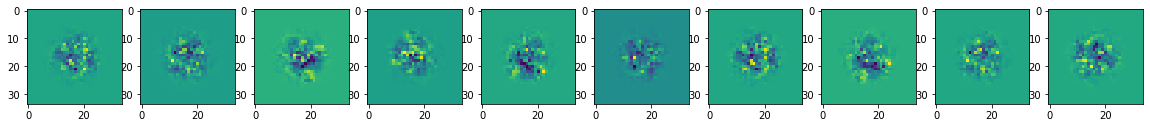

519.3509175777435 sec
0 batch 19 iteration
generated


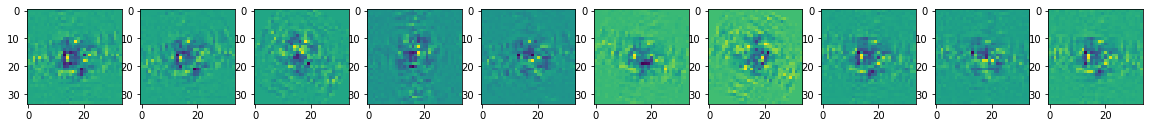

real


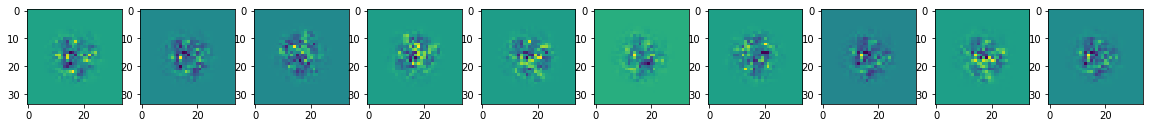

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 400 samples in 0.001s...
[t-SNE] Computed neighbors for 400 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 400 / 400
[t-SNE] Mean sigma: 3.990309
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.165451
[t-SNE] KL divergence after 1000 iterations: 0.149344
self.All_U_kron_shape torch.Size([39304, 5832])
self.PCs.shape torch.Size([5832, 5])


/home/users/lewis841214/.conda/envs/protein_reconstruction/lib/python3.6/site-packages/ipykernel_launcher.py:522: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


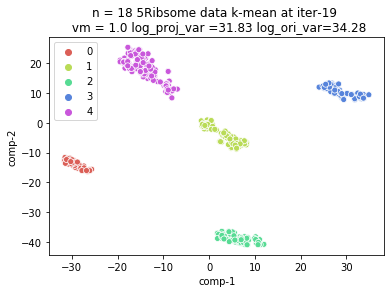

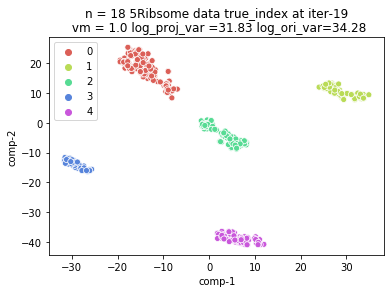

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


513.0131957530975 sec
0 batch 20 iteration
generated


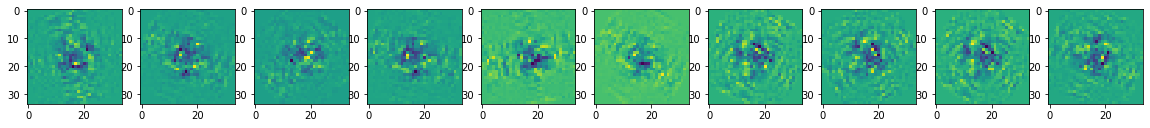

real


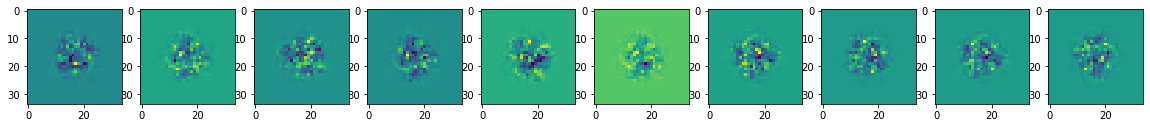

515.5172762870789 sec
0 batch 21 iteration
generated


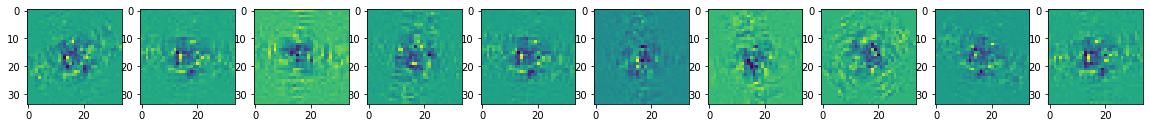

real


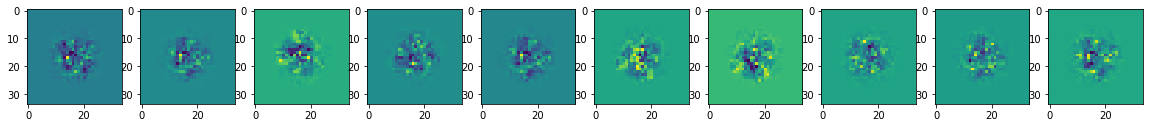

517.095067024231 sec
0 batch 22 iteration
generated


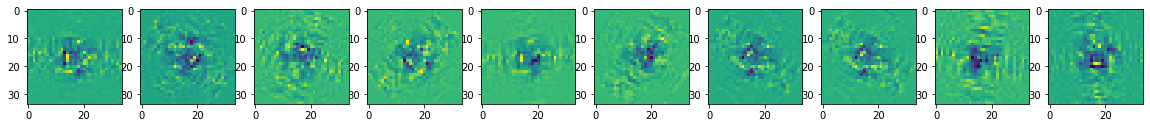

real


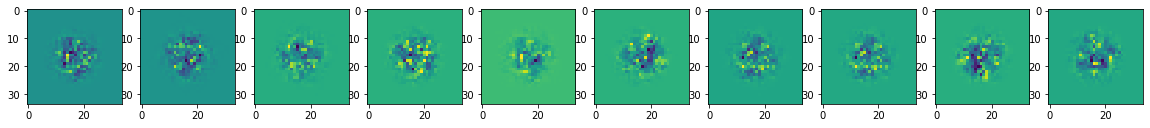

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 400 samples in 0.001s...
[t-SNE] Computed neighbors for 400 samples in 0.009s...
[t-SNE] Computed conditional probabilities for sample 400 / 400
[t-SNE] Mean sigma: 3.791459
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.427616
[t-SNE] KL divergence after 1000 iterations: 0.152894
self.All_U_kron_shape torch.Size([39304, 5832])
self.PCs.shape torch.Size([5832, 5])


/home/users/lewis841214/.conda/envs/protein_reconstruction/lib/python3.6/site-packages/ipykernel_launcher.py:522: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


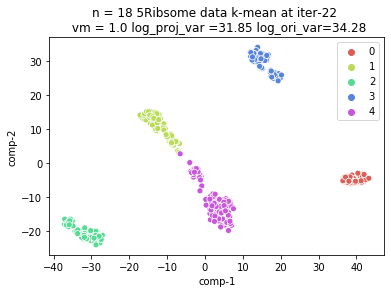

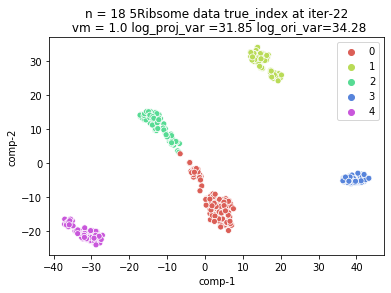

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


513.4583530426025 sec
0 batch 23 iteration
generated


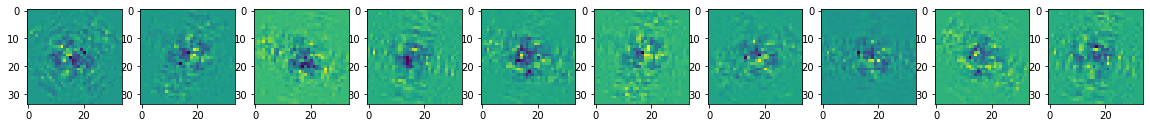

real


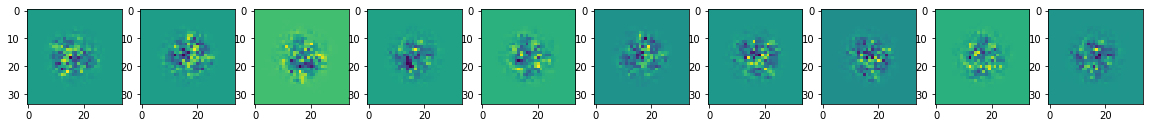

ratio / 5
517.5046043395996 sec
0 batch 24 iteration
generated


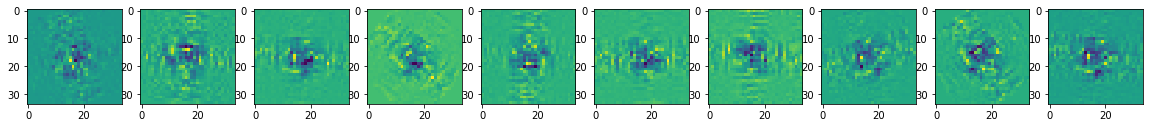

real


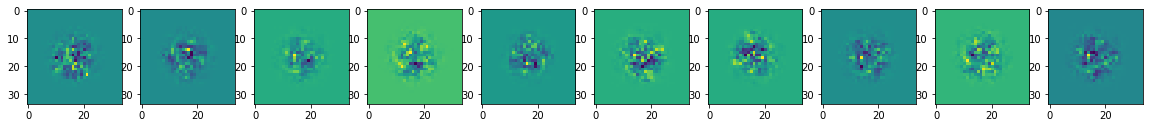

512.4759232997894 sec
0 batch 25 iteration
generated


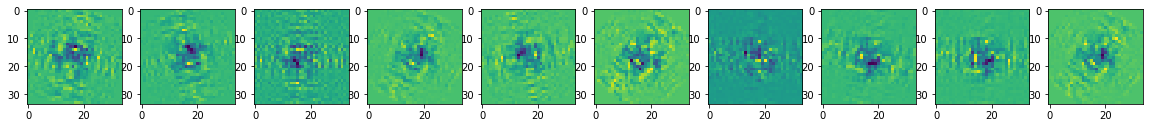

real


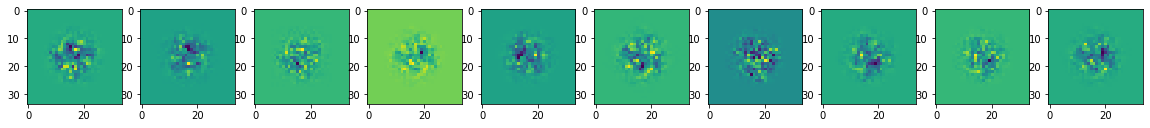

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 400 samples in 0.001s...
[t-SNE] Computed neighbors for 400 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 400 / 400
[t-SNE] Mean sigma: 3.999520
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.663372
[t-SNE] KL divergence after 1000 iterations: 0.161725
self.All_U_kron_shape torch.Size([39304, 5832])
self.PCs.shape torch.Size([5832, 5])


/home/users/lewis841214/.conda/envs/protein_reconstruction/lib/python3.6/site-packages/ipykernel_launcher.py:522: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


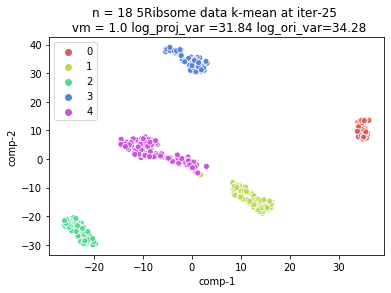

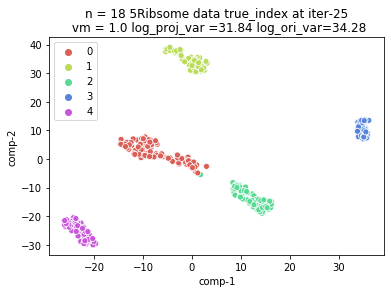

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


517.5284543037415 sec
0 batch 26 iteration
generated


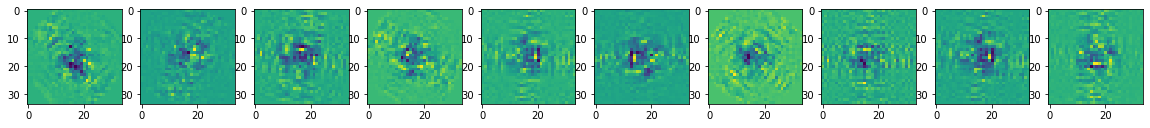

real


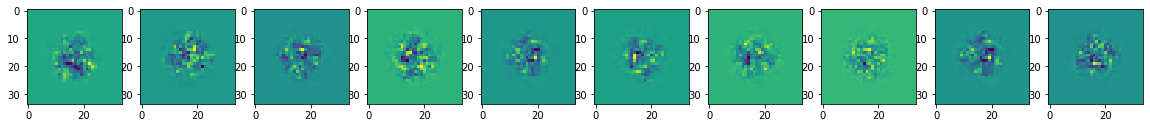

519.0496726036072 sec
0 batch 27 iteration
generated


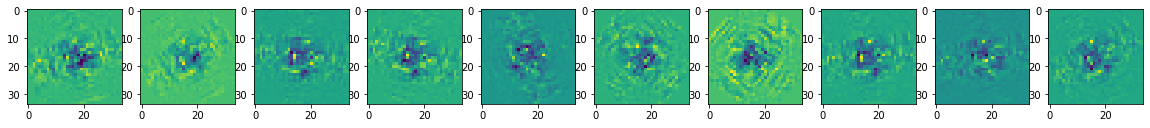

real


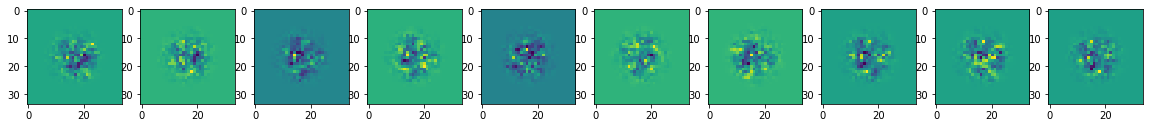

513.7131562232971 sec
0 batch 28 iteration
generated


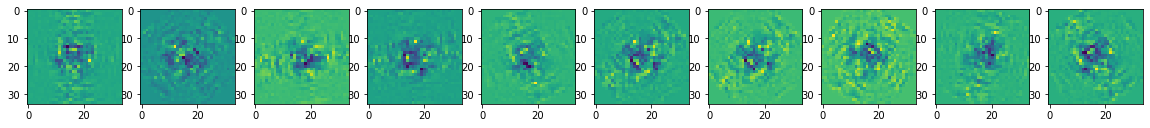

real


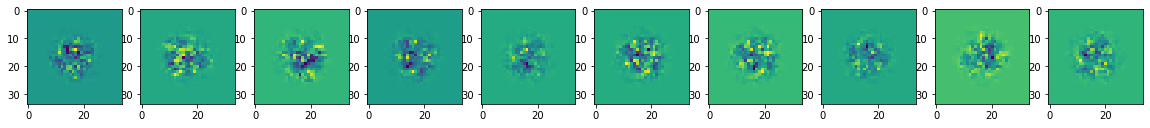

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 400 samples in 0.001s...
[t-SNE] Computed neighbors for 400 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 400 / 400
[t-SNE] Mean sigma: 4.121509
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.531223
[t-SNE] KL divergence after 1000 iterations: 0.153221
self.All_U_kron_shape torch.Size([39304, 5832])
self.PCs.shape torch.Size([5832, 5])


/home/users/lewis841214/.conda/envs/protein_reconstruction/lib/python3.6/site-packages/ipykernel_launcher.py:522: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


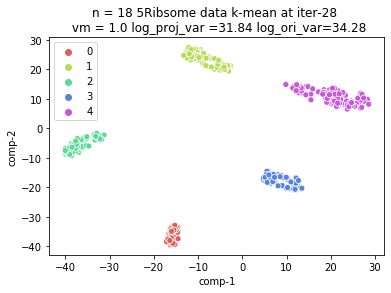

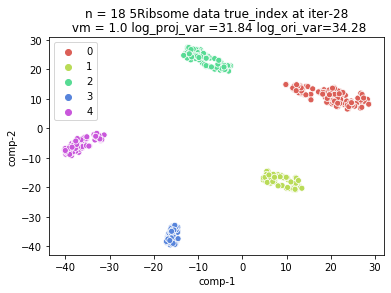

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


518.3993785381317 sec
0 batch 29 iteration
generated


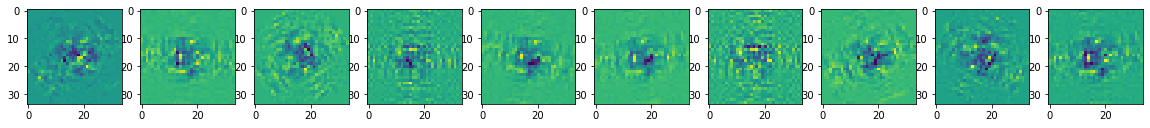

real


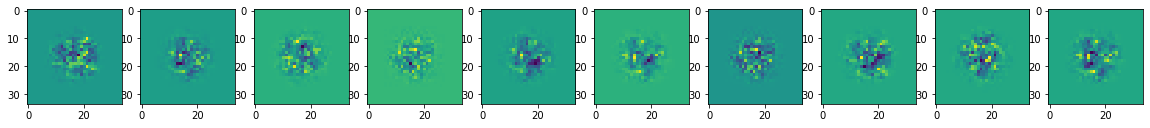

ratio / 5
512.2229313850403 sec
0 batch 30 iteration
generated


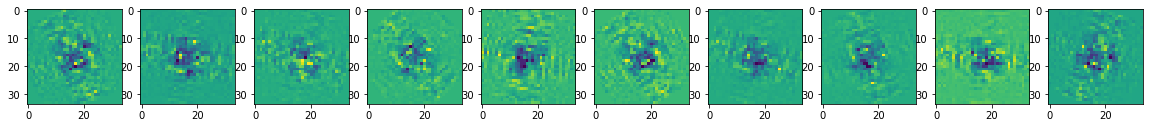

real


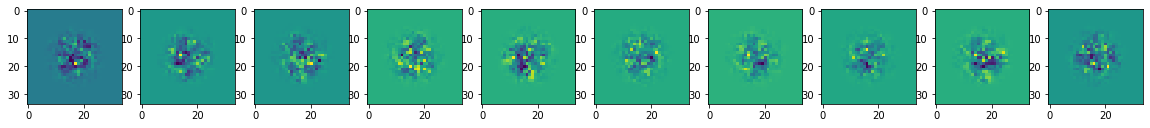

515.6342213153839 sec
0 batch 31 iteration
generated


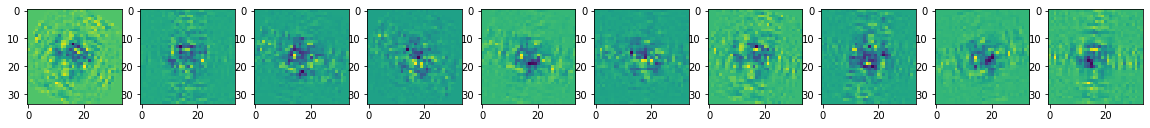

real


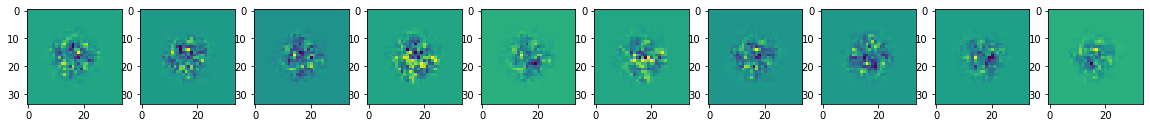

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 400 samples in 0.001s...
[t-SNE] Computed neighbors for 400 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 400 / 400
[t-SNE] Mean sigma: 4.015325
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.397526
[t-SNE] KL divergence after 1000 iterations: 0.160528
self.All_U_kron_shape torch.Size([39304, 5832])
self.PCs.shape torch.Size([5832, 5])


/home/users/lewis841214/.conda/envs/protein_reconstruction/lib/python3.6/site-packages/ipykernel_launcher.py:522: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


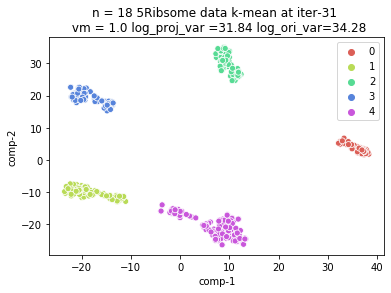

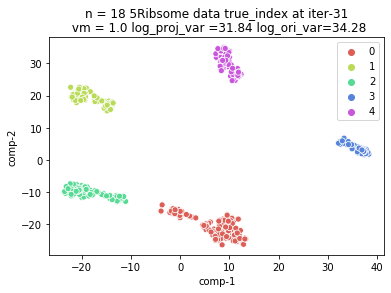

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


513.701057434082 sec
0 batch 32 iteration
generated


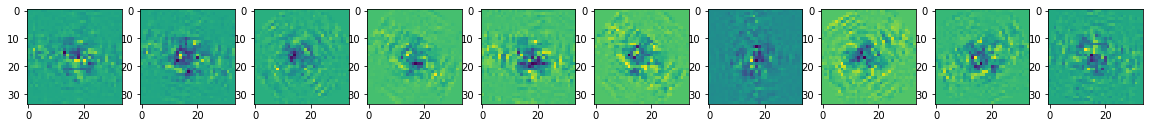

real


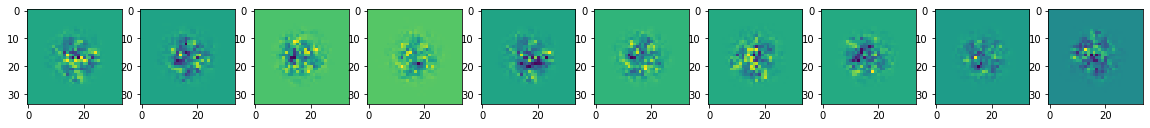

515.981461763382 sec
0 batch 33 iteration
generated


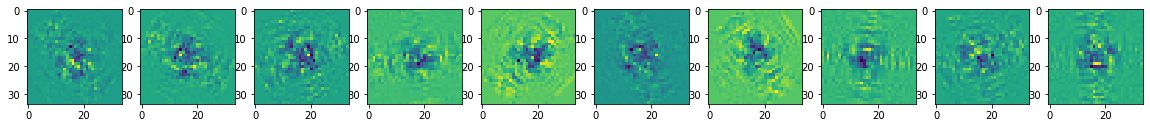

real


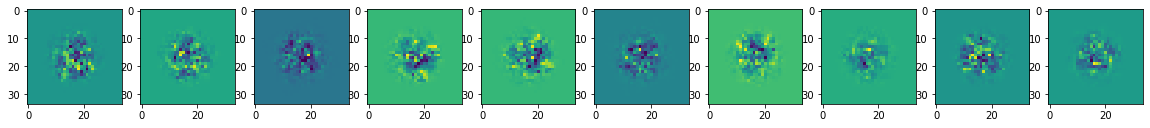

520.0643365383148 sec
0 batch 34 iteration
generated


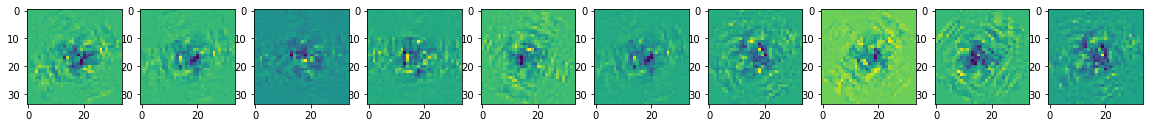

real


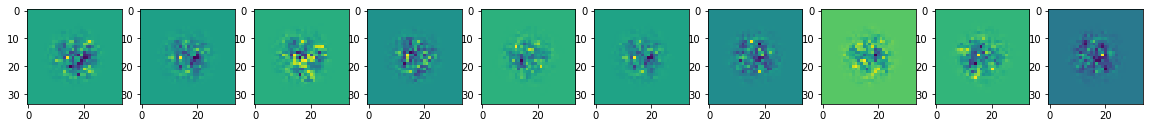

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 400 samples in 0.001s...
[t-SNE] Computed neighbors for 400 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 400 / 400
[t-SNE] Mean sigma: 4.386515
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.386639
[t-SNE] KL divergence after 1000 iterations: 0.157479
self.All_U_kron_shape torch.Size([39304, 5832])
self.PCs.shape torch.Size([5832, 5])


/home/users/lewis841214/.conda/envs/protein_reconstruction/lib/python3.6/site-packages/ipykernel_launcher.py:522: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


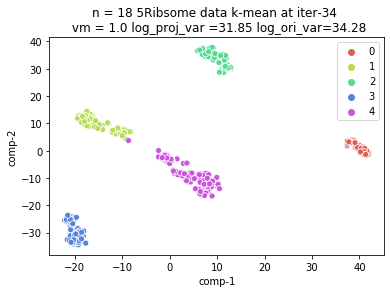

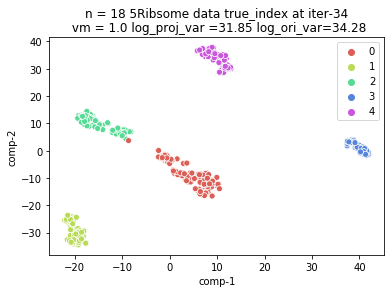

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


518.32244348526 sec
0 batch 35 iteration
generated


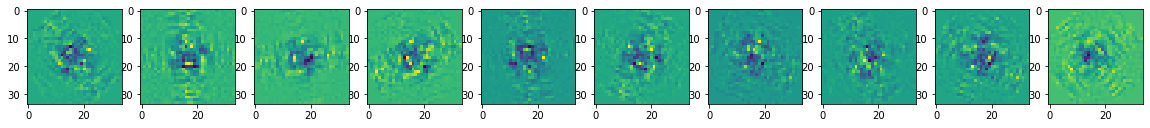

real


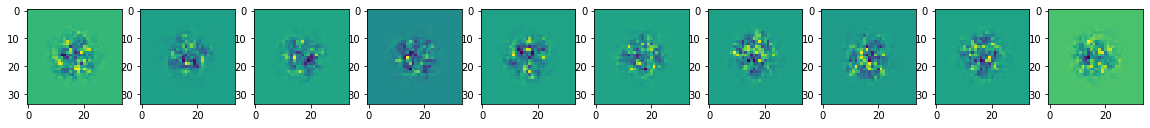

ratio / 5
509.76405572891235 sec
0 batch 36 iteration
generated


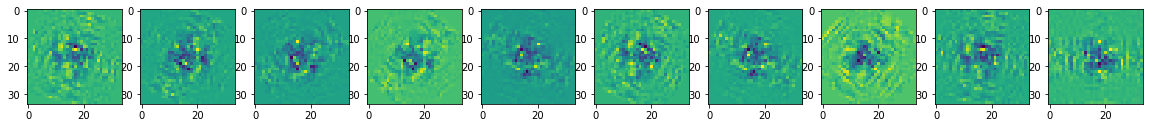

real


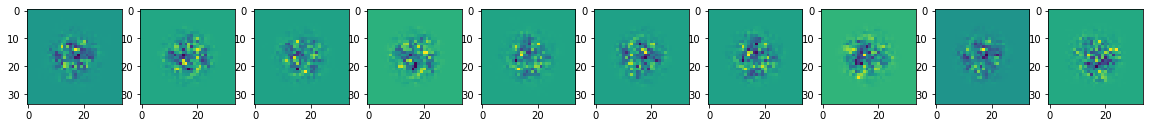

518.3288292884827 sec
0 batch 37 iteration
generated


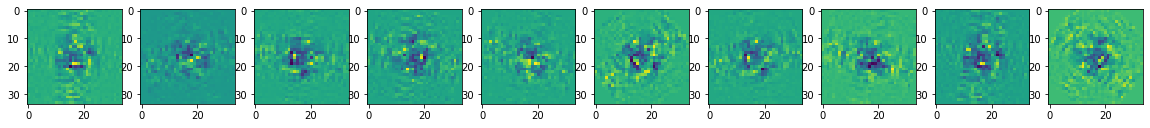

real


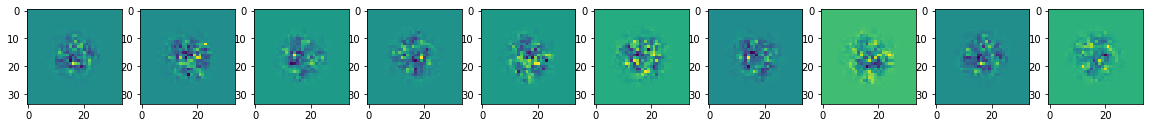

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 400 samples in 0.001s...
[t-SNE] Computed neighbors for 400 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 400 / 400
[t-SNE] Mean sigma: 4.175186
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.711857
[t-SNE] KL divergence after 1000 iterations: 0.154496
self.All_U_kron_shape torch.Size([39304, 5832])
self.PCs.shape torch.Size([5832, 5])


/home/users/lewis841214/.conda/envs/protein_reconstruction/lib/python3.6/site-packages/ipykernel_launcher.py:522: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


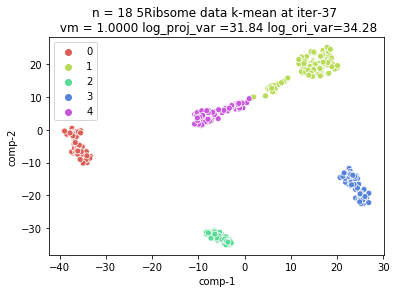

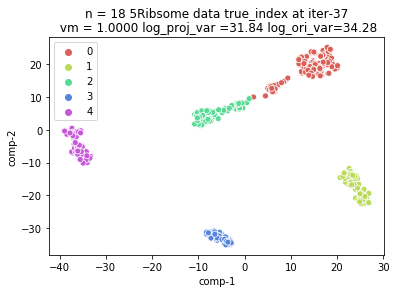

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


518.0288450717926 sec
0 batch 38 iteration
generated


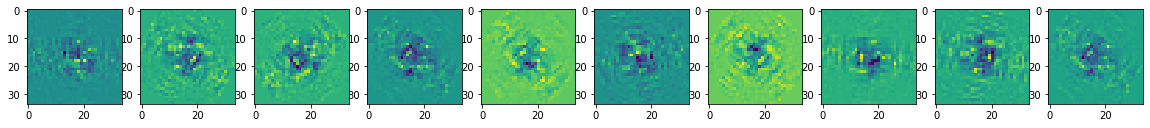

real


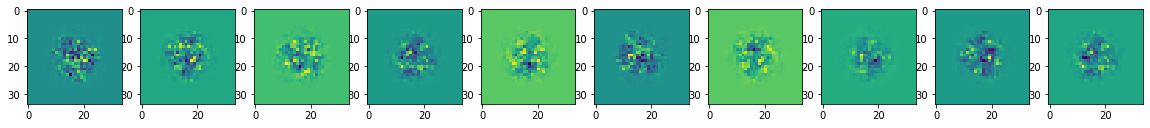

516.0260488986969 sec
0 batch 39 iteration
generated


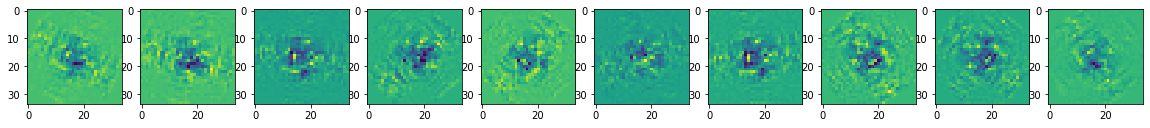

real


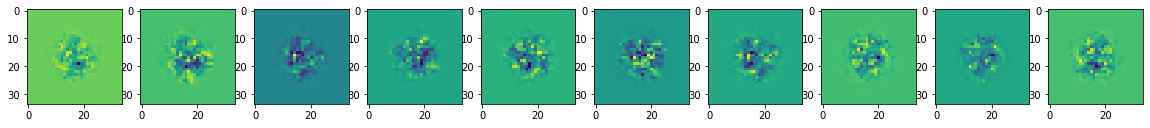

517.6579596996307 sec
0 batch 40 iteration
generated


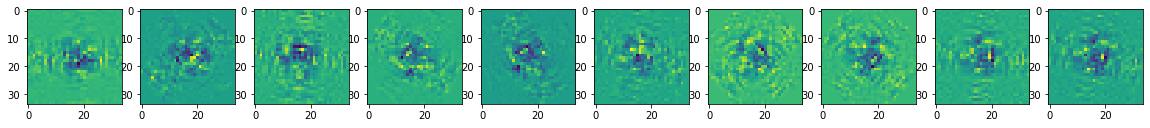

real


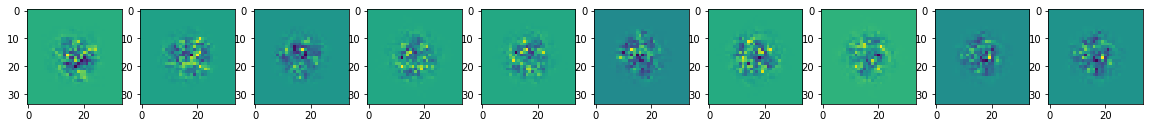

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 400 samples in 0.001s...
[t-SNE] Computed neighbors for 400 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 400 / 400
[t-SNE] Mean sigma: 4.154761
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.170593
[t-SNE] KL divergence after 1000 iterations: 0.151413
self.All_U_kron_shape torch.Size([39304, 5832])
self.PCs.shape torch.Size([5832, 5])


/home/users/lewis841214/.conda/envs/protein_reconstruction/lib/python3.6/site-packages/ipykernel_launcher.py:522: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


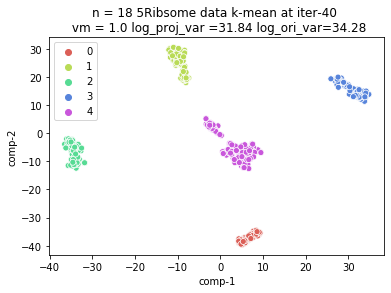

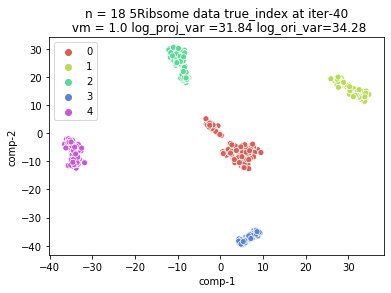

the 0 th iter


/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 400 samples in 0.000s...
[t-SNE] Computed neighbors for 400 samples in 0.013s...
[t-SNE] Computed conditional probabilities for sample 400 / 400
[t-SNE] Mean sigma: 4.154760
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.631641
[t-SNE] KL divergence after 1000 iterations: 0.152278
self.All_U_kron_shape torch.Size([39304, 5832])
self.PCs.shape torch.Size([5832, 5])


/home/users/lewis841214/.conda/envs/protein_reconstruction/lib/python3.6/site-packages/ipykernel_launcher.py:522: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


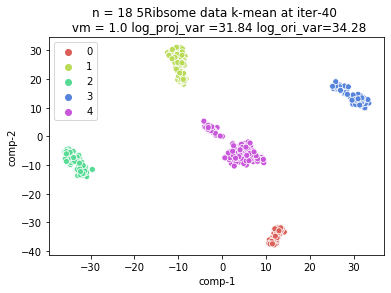

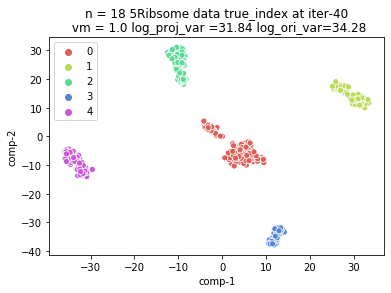

(9200, 34, 34)


/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 400 samples in 0.000s...
[t-SNE] Computed neighbors for 400 samples in 0.009s...
[t-SNE] Computed conditional probabilities for sample 400 / 400
[t-SNE] Mean sigma: 8.648208
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.391647
[t-SNE] KL divergence after 1000 iterations: 0.152551
self.All_U_kron_shape torch.Size([39304, 10648])
self.PCs.shape torch.Size([10648, 5])


/home/users/lewis841214/.conda/envs/protein_reconstruction/lib/python3.6/site-packages/ipykernel_launcher.py:522: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


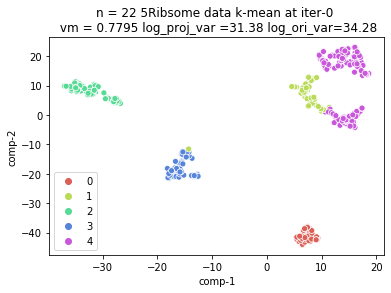

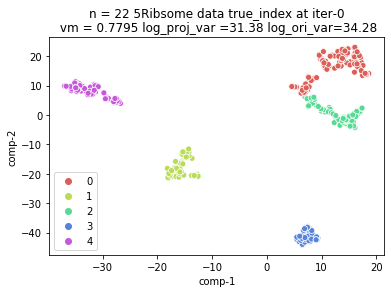

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


generated


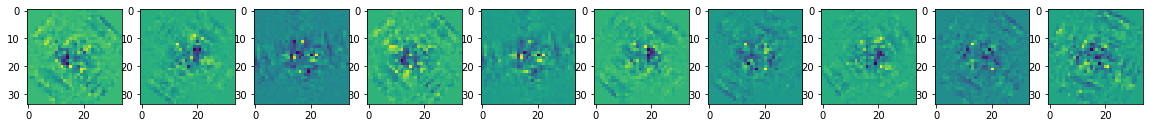

real


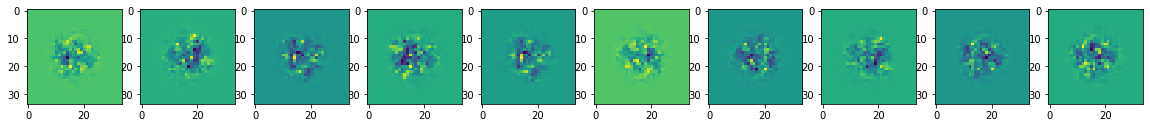

1288.5625493526459 sec
0 batch 1 iteration
generated


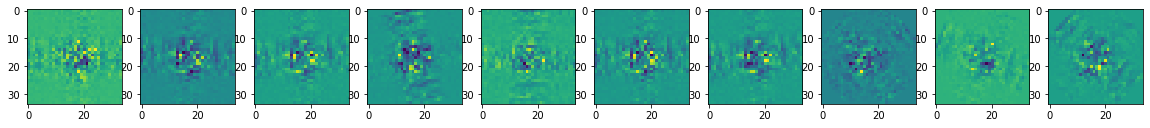

real


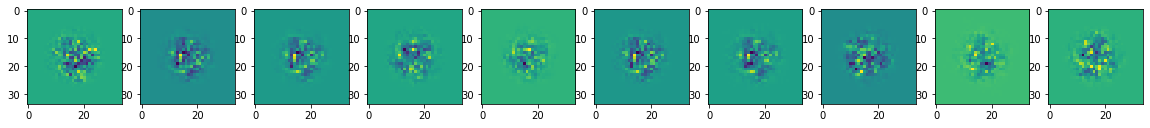

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 400 samples in 0.001s...
[t-SNE] Computed neighbors for 400 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 400 / 400
[t-SNE] Mean sigma: 5.282848
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.265255
[t-SNE] KL divergence after 1000 iterations: 0.139159
self.All_U_kron_shape torch.Size([39304, 10648])
self.PCs.shape torch.Size([10648, 5])


/home/users/lewis841214/.conda/envs/protein_reconstruction/lib/python3.6/site-packages/ipykernel_launcher.py:522: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


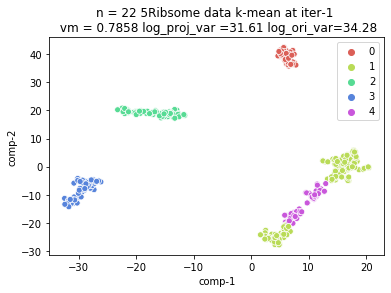

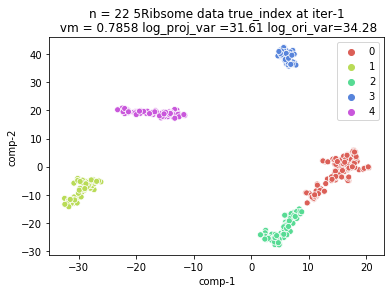

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


KeyboardInterrupt: 

In [104]:
#n_list = [2,5,6,7, 10, 15,18]#, 22]
n_list = [15,18, 22]#,  22, 10]
#n_list.reverse()
#b_list = [400,400,400, 400, 200,100 , 100]#, 100]
b_list = [ 100, 100, 100]
#b_list.reverse()
iter_list = [40 for i in range(len(n_list))]
for i in range(len(n_list)):
    n = n_list[i]
    b = b_list[i]
    niter = iter_list[i]
    Images = new_projection[:9200]
    print(Images.shape)
    exp_name = f'20220119_n_{n}_MPCA_clean_{sn_ratio}_initial_random_projected_var'
    ProjSize, num_image, n_component , num_iter = 34, 9200, n, niter
    batch_size = b
    Vol_geom = astra.create_vol_geom(34, 34, 34)
    #Images = torch.ones(num_image, 48, 48) # fake images for computing purpose
    """
    Proj_geom = astra.create_proj_geom('parallel3d_vec', ProjSize, ProjSize, Orientation_Vectors)
    Vol_geom = astra.create_vol_geom(32, 32, 32)
    vg = ts.from_astra(Vol_geom)
    pg = ts.from_astra(Proj_geom)
    op = ts.operator(vg, pg)
    """
    vg = ts.from_astra(Vol_geom)
    pg = ts.from_astra(Proj_geom)
    op = ts.operator(vg, pg)
    MP3 = MPCA_3d_recon(ProjSize, num_image, n_component, op , Images, exp_name, batch_size, niter)
    MP3.fit(start_ratio = 0.01)
"""
MP3.A_pro_All_U()

MP3.Plot_temp()
MP3.Q_Function()

MP3.Expectation()
MP3.Q_Function()
MP3.Maximization()
MP3.Plot_temp()
MP3.Q_Function()
print(MP3.All_U.shape)
"""


In [ ]:
#Run 

In [ ]:
"""
U1 = torch.load('./snap_shot/1229_n_22_MPCA_sigma_j_monitor_0th_55_U1.pt')
U2 = torch.load('./snap_shot/1229_n_22_MPCA_sigma_j_monitor_0th_55_U2.pt')
U3 = torch.load('./snap_shot/1229_n_22_MPCA_sigma_j_monitor_0th_55_U3.pt')
MP3.U1.data = U1.detach()
MP3.U2.data = U2.detach()
MP3.U3.data = U3.detach()
"""

#MP3.fit(start_ratio = 0.1)


In [ ]:
lr = torch.mean(torch.abs(MP3.U1)) * 0.1
print(torch.mean(torch.abs(MP3.U1)))

In [ ]:
#increase batch_size, decrease learning rate
#first load 15 trained component from n = 15 set
"""
U1 = torch.load('./snap_shot/1227_n_18_MPCA_0th_U1.pt')
U2 = torch.load('./snap_shot/1227_n_18_MPCA_0th_U1.pt')
U3 = torch.load('./snap_shot/1227_n_18_MPCA_0th_U1.pt')
MP3.U1.data = U1.detach()
MP3.U2.data = U2.detach()
MP3.U3.data = U3.detach()

"""




#MP3.fit(start_ratio = 0.1)



In [ ]:
MP3.Output_colection()
Coef = np.array(MP3.All_mu)
#Then perform PCA of T-SNE on allMu
print(Coef.shape)

In [ ]:

tsne = TSNE(n_components=2, verbose=1, random_state=123)

"""
x = Coef.reshape(5000, -1)
z = tsne.fit_transform(x) 
"""


In [ ]:
import numpy as np
"""
np.random.seed(0)

indexs = np.random.randint(5, size = 5000)
print(indexs[:10])
df = pd.DataFrame()
df["y"] = indexs
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 5),
                data=df).set(title="5Ribsome data true label") 

"""


In [ ]:
print(Coef.shape)
Coef = Coef.reshape(9200, -1)
pca = PCA(n_components=5)
pca.fit(Coef)
P_Coef = pca.transform(Coef)
print(P_Coef.shape)

In [ ]:
z = tsne.fit_transform(P_Coef) 
import numpy as np
np.random.seed(0)


In [ ]:
print(z.shape)
#print(len(indexs))

indexs = Index_3DVA[:9200]
print(indexs[:10])
df = pd.DataFrame()
df["y"] = indexs
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 5),
                data=df).set(title="5Ribsome data true label") 


In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(P_Coef) #k-mean perform on PCA coef
kmeans.labels_

df = pd.DataFrame()
df["y"] = kmeans.labels_
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 5),
                data=df).set(title="5Ribsome data k-mean") 

In [ ]:

print(v_measure_score(indexs, kmeans.labels_))